In [1]:
# https://github.com/laszewsk/mlcommons/commit/5ea94e88e1fc9ba58f994fb3425ab3594b76f92c
# all experiments done with
# mlcommons/benchmarks/earthquake/mar2022/FFFFWNPFEARTHQ_newTFTv29-gregor.ipynb
# tagged with version 1.0

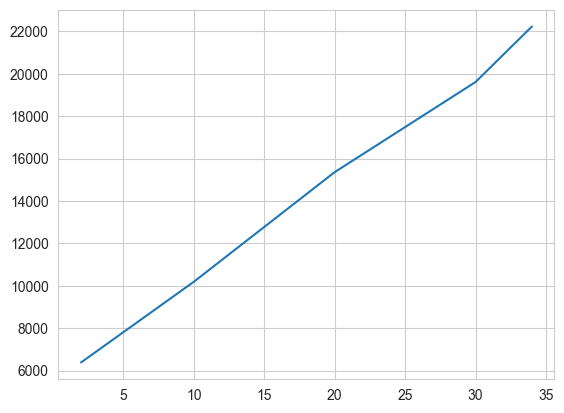

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [2, 10, 20, 30, 34]
y = [6380, 10185, 15360, 19613, 22233]

sns.lineplot(x=x, y=y)
plt.show()

In [3]:
import os
parent_dir = os.getcwd()
print(parent_dir)
GRAPHICSDIR = '../images/rtx3090'
path = os.path.join(parent_dir, GRAPHICSDIR)
if not os.path.exists(path):
    os.makedirs(path)

C:\Users\stapm\cm\mlcommons\benchmarks\earthquake\latest


In [4]:
%matplotlib inline

def SAVEFIG(fig, filename, path=None, formats=('png', 'pdf')):
    local_path = f'../data/EarthquakeDec2020/Outputs' if path is None else path

    fileout = f"{local_path}/{filename}".replace("\n", " ").replace(">", " ").replace("<", " ")
    for my_format in formats:
        fig.savefig(f"{fileout}.{my_format}", format=my_format, bbox_inches="tight")
    return fig, tuple(f'{fileout}.{fmt}' for fmt in formats)

#plot, _ = SAVEFIG(fig, 'name_here', GRAPHICSDIR)
#plot, _ = SAVEFIG(fig.figure, 'name_here', GRAPHICSDIR) for seaborn

In [5]:
def predict_time(x,y, x_pred):
    # x_pred = [0, 2,10,20, 30, 40,50,60, 66]
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x_real = np.array(x).reshape((-1, 1))
    y_real = np.array(y)
    model = LinearRegression()
    model.fit(x_real, y_real)

    r_sq = model.score(x_real, y_real)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    x_pred_r = np.array(x_pred).reshape((-1, 1))

    y_pred = model.predict(x_pred_r)

    y_pred = [round(x) for x in y_pred]

    print('predicted response:', y_pred, sep='\n')

    return y_pred


In [6]:
x_pred = [0, 2,10,20, 30, 40,50,60, 66]
y_pred = predict_time(x,y, x_pred)

coefficient of determination: 0.9983134242654341
intercept: 5386.732142857143
slope: [487.88895089]
predicted response:
[5387, 6363, 10266, 15145, 20023, 24902, 29781, 34660, 37587]


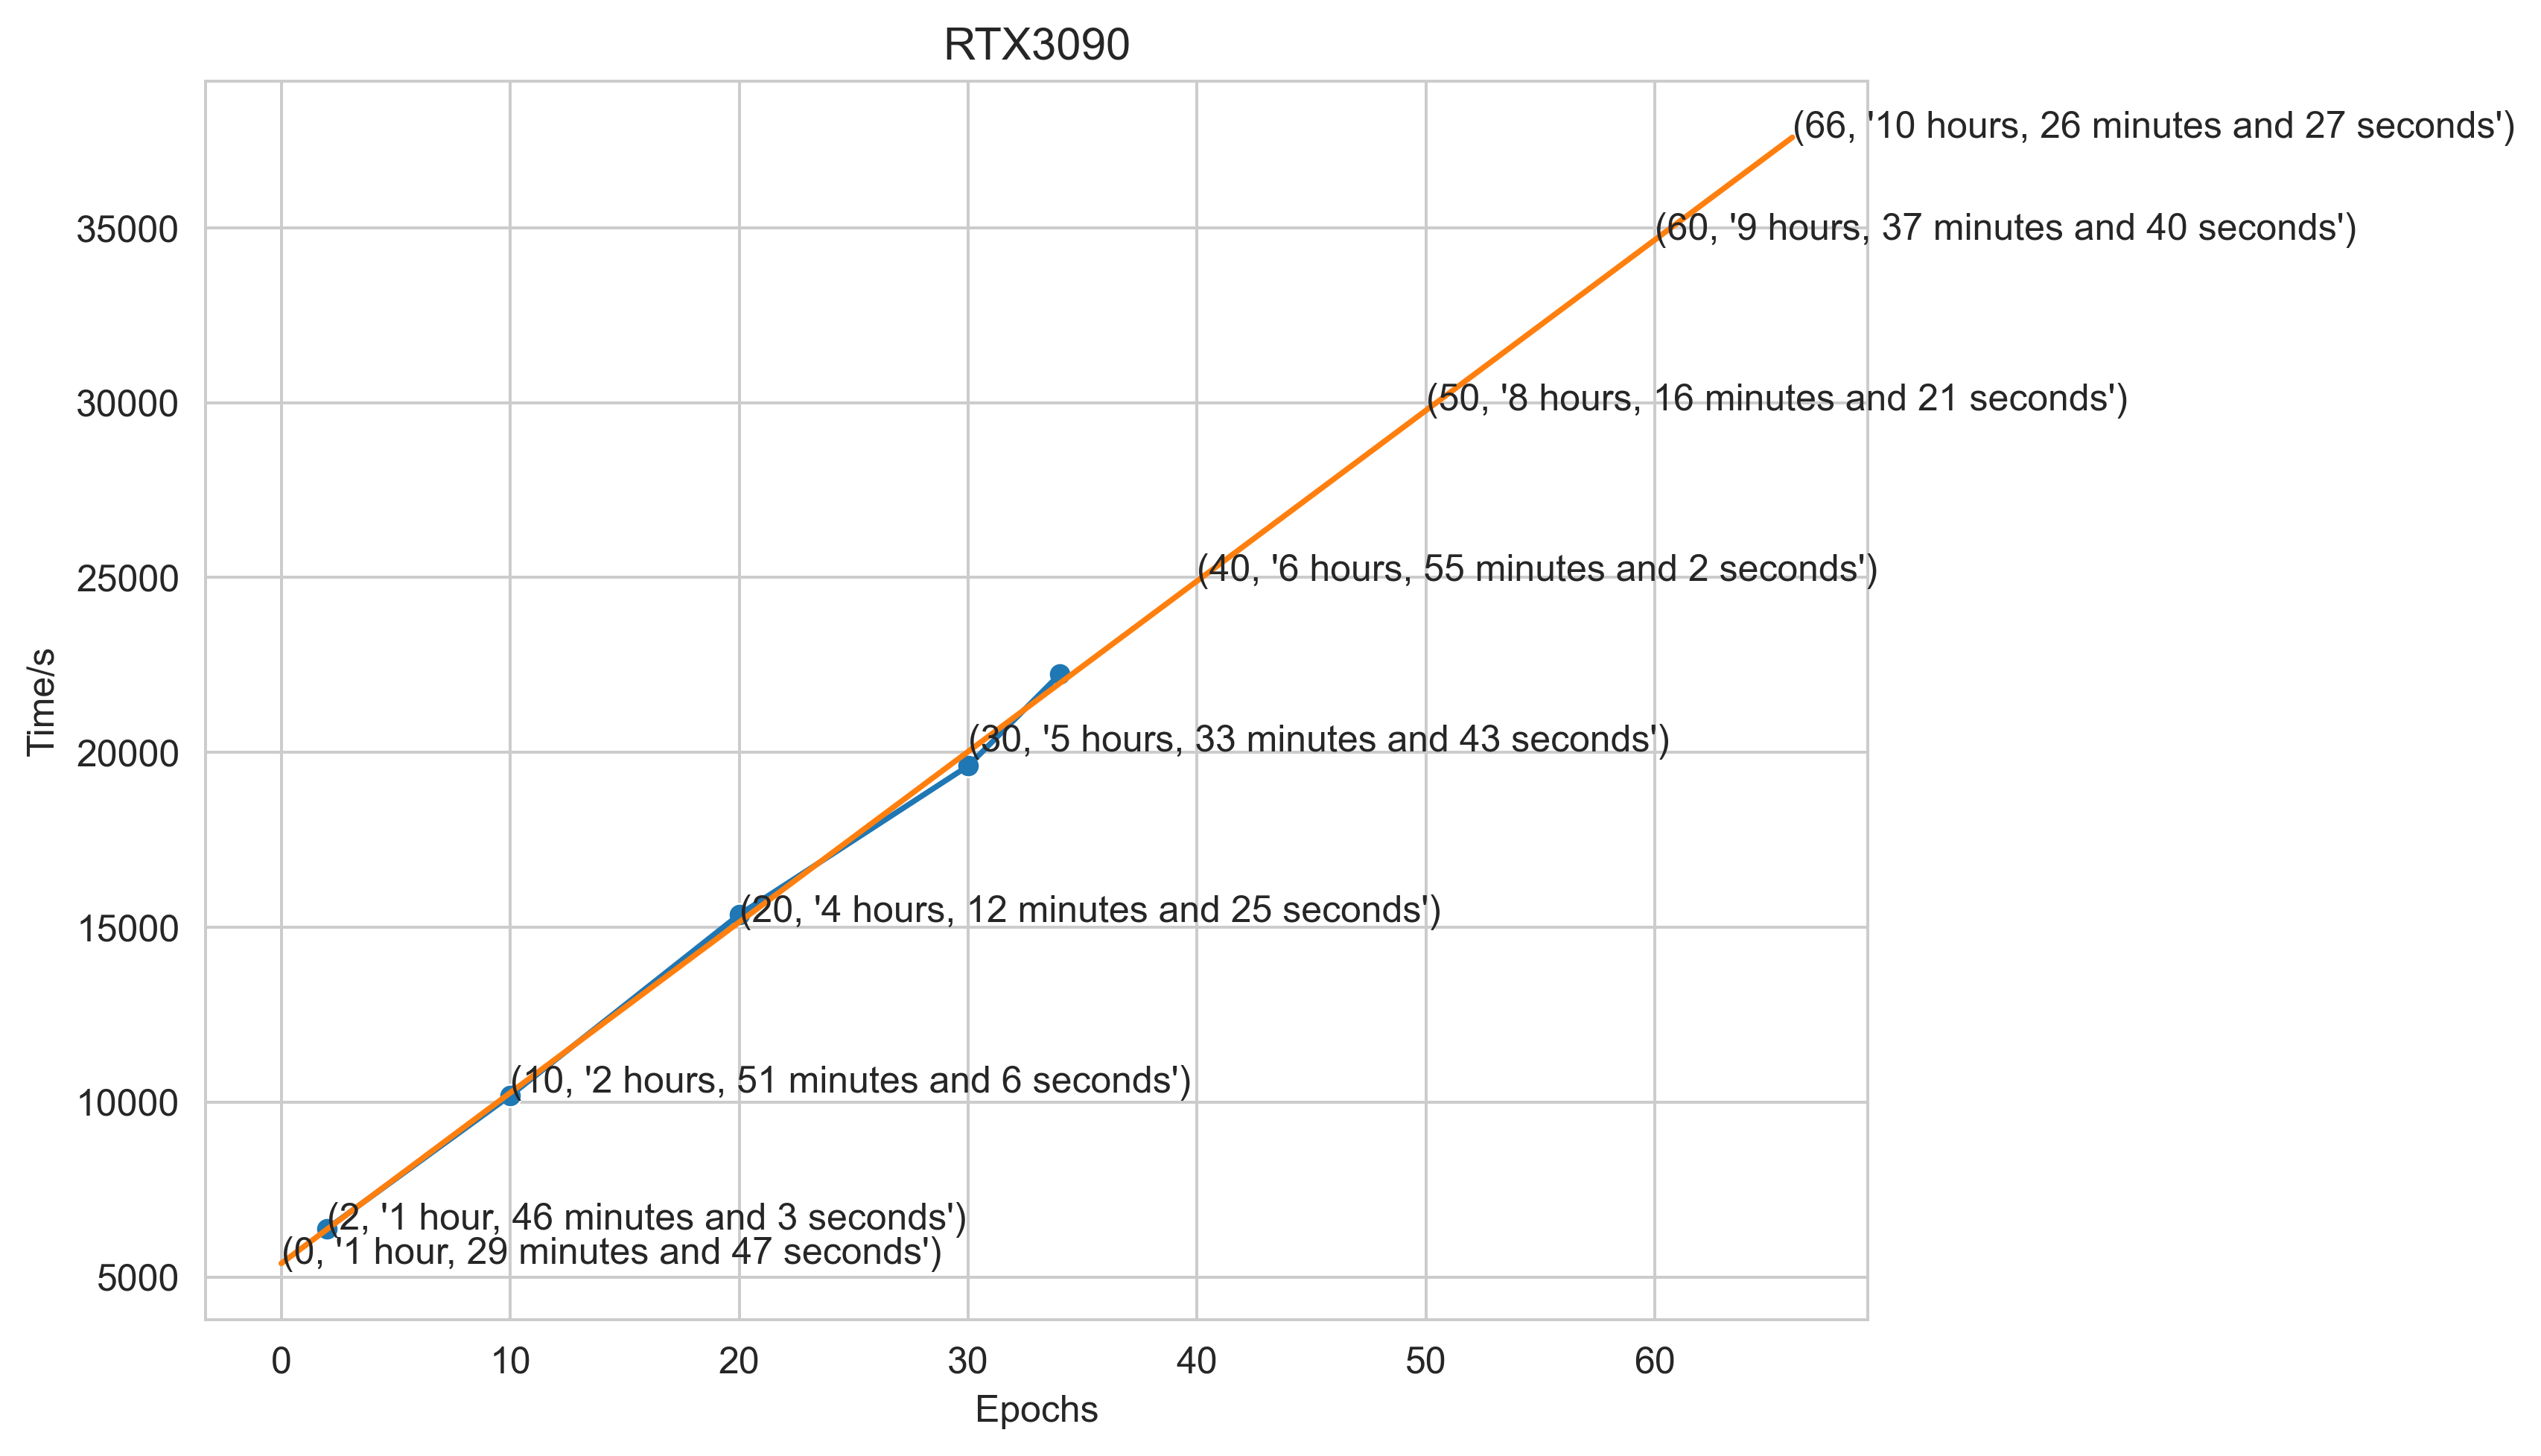

In [7]:
from matplotlib.pyplot import figure
import humanize

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=360)
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("RTX3090")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plot, _ = SAVEFIG(fig, 'RTX3090', GRAPHICSDIR)
plt.show()

x_rtx3090 = x
y_rtx3090 = y

In [8]:
import pandas as pd
import io

In [9]:
epoch2 = \
"""
| Timer                        | Status  | K80(r)    | V100(r)    | A100(r)  | RTX3090(G) | RTX3080(R) | V100(L) |
| total                        |  ok     |  28343.3  |   20295    |  17574.8 |   6589.41  |    8348.49 | 19697.1 |
| legal sampling location      |  ok     |   1779.63 |   1546.38  |  1226.95 |   457.886  |    532.535 | 1229.91 |
| RunTFTCustomVersion tft only |  ok     |     0.001 |     0.001  |    0.001 |       0    |        0   | 0.001   |
| RunTFTCustomVersion init     |  ok     |     5.327 |     5.624  |    8.078 |      0.84  |     3.612  | 3.548   |
| RunTFTCustomVersion train    |  ok     |   6967.26 |    1671.35 |  1373.01 |   1103.15  |    2068.9  | 1608.61 |
| RunTFTCustomVersion bestfit  |  ok     |   17037.6 |    14795.1 |  13022.1 |   4420.31  |    4997.13 | 14303.7 |
| label2                       |  ok     |     0.002 |      0.002 |    0.002 |      0.001 |      0.001 | 0.002   |
| label3                       |  ok     |     0.108 |     0.096  |    0.099 |     0.033  |      0.036 | 0.01    |
""".strip().replace("\n", ";")
epoch2 = " ".join(epoch2.split()).replace("| ", "|").replace(" |", "|").replace(";", "\n")
print (epoch2)
df = pd.read_table(io.StringIO(epoch2),delimiter='|')

df.drop(df.columns[[0]], axis = 1, inplace = True)  # drop unnamed column
df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
df = df.iloc[: , :-1] # drop Last column
df = df.set_index('Timer')
df

|Timer|Status|K80(r)|V100(r)|A100(r)|RTX3090(G)|RTX3080(R)|V100(L)|
|total|ok|28343.3|20295|17574.8|6589.41|8348.49|19697.1|
|legal sampling location|ok|1779.63|1546.38|1226.95|457.886|532.535|1229.91|
|RunTFTCustomVersion tft only|ok|0.001|0.001|0.001|0|0|0.001|
|RunTFTCustomVersion init|ok|5.327|5.624|8.078|0.84|3.612|3.548|
|RunTFTCustomVersion train|ok|6967.26|1671.35|1373.01|1103.15|2068.9|1608.61|
|RunTFTCustomVersion bestfit|ok|17037.6|14795.1|13022.1|4420.31|4997.13|14303.7|
|label2|ok|0.002|0.002|0.002|0.001|0.001|0.002|
|label3|ok|0.108|0.096|0.099|0.033|0.036|0.01|


,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),V100(L)
Timer,,,,,,
total,28343.300,20295.000,17574.800,6589.410,8348.490,19697.100
legal sampling location,1779.630,1546.380,1226.950,457.886,532.535,1229.910
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.000,0.000,0.001
RunTFTCustomVersion init,5.327,5.624,8.078,0.840,3.612,3.548
RunTFTCustomVersion train,6967.260,1671.350,1373.010,1103.150,2068.900,1608.610
RunTFTCustomVersion bestfit,17037.600,14795.100,13022.100,4420.310,4997.130,14303.700
label2,0.002,0.002,0.002,0.001,0.001,0.002
label3,0.108,0.096,0.099,0.033,0.036,0.010


In [10]:
#result_colab = df.loc[["total"]].transpose()
#result_colab
epoch_2 = pd.DataFrame(df)
epoch_2

,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),V100(L)
Timer,,,,,,
total,28343.300,20295.000,17574.800,6589.410,8348.490,19697.100
legal sampling location,1779.630,1546.380,1226.950,457.886,532.535,1229.910
RunTFTCustomVersion tft only,0.001,0.001,0.001,0.000,0.000,0.001
RunTFTCustomVersion init,5.327,5.624,8.078,0.840,3.612,3.548
RunTFTCustomVersion train,6967.260,1671.350,1373.010,1103.150,2068.900,1608.610
RunTFTCustomVersion bestfit,17037.600,14795.100,13022.100,4420.310,4997.130,14303.700
label2,0.002,0.002,0.002,0.001,0.001,0.002
label3,0.108,0.096,0.099,0.033,0.036,0.010


In [11]:
def read_cm_csv_benchmark(content, deliminter=",", label=None):
    _content = content.strip().replace("# csv,", "")
    df = pd.read_table(io.StringIO(_content),delimiter=',')
    df.drop(df.columns[[1]], axis = 1, inplace = True)  # drop Status
    if label:
        df.columns.values[1] = label
    return df

In [12]:
# colab P100
colab = {}

colab["40"] = \
"""
# csv,timer,status,time
# csv,total,ok,65791.932
# csv,data head setup,ok,2478.995
# csv,legal sampling location,ok,1229.914
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.735
# csv,RunTFTCustomVersion A,ok,62897.312
# csv,RunTFTCustomVersion init,ok,3.923
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,49880.256
# csv,RunTFTCustomVersion bestfit,ok,13013.03
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.493
# csv,RunTFTCustomVersion bestfit summary,ok,0.072
# csv,RunTFTCustomVersion bestfit network summary,ok,0.381
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.044
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.039
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.121
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.036
# csv,RunTFTCustomVersion bestfit finalize,ok,13010.779
# csv,label1,ok,0.0
# csv,label2,ok,0.003
# csv,label3,ok,0.076
"""

colab["20"] = \
"""
# csv,timer,status,time
# csv,total,ok,35726.344
# csv,data head setup,ok,1697.409
# csv,legal sampling location,ok,849.307
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.528
# csv,RunTFTCustomVersion A,ok,33707.727
# csv,RunTFTCustomVersion init,ok,1.526
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,24543.595
# csv,RunTFTCustomVersion bestfit,ok,9162.509
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.133
# csv,RunTFTCustomVersion bestfit summary,ok,0.064
# csv,RunTFTCustomVersion bestfit network summary,ok,0.299
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.027
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.024
# csv,RunTFTCustomVersion bestfit finalize,ok,9160.819
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.059
"""

colab["2"] = \
"""
# csv,timer,status,time
# csv,total,ok,13654.088
# csv,data head setup,ok,1642.207
# csv,legal sampling location,ok,823.203
# csv,RunTFTCustomVersion tft only,ok,0.0
# csv,RunTFTCustomVersion print,ok,0.566
# csv,RunTFTCustomVersion A,ok,11668.538
# csv,RunTFTCustomVersion init,ok,3.207
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,2538.811
# csv,RunTFTCustomVersion bestfit,ok,9126.446
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.002
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.542
# csv,RunTFTCustomVersion bestfit summary,ok,0.059
# csv,RunTFTCustomVersion bestfit network summary,ok,0.275
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.023
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.029
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.078
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.031
# csv,RunTFTCustomVersion bestfit finalize,ok,9124.368
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.062
"""

In [13]:
rivanna = {
   "rivanna_v_100_localscratch": {} ,
   "rivanna_a_100_project": {},
   "rivanna_v100_project": {},
   "rivanna_p100_project": {},
   "rivanna_k80_project": {},
   "rivanna_rtx2080_project": {},
   "rivanna_a100_scratch": {},
   "rivanna_v100_scratch": {},
   "rivanna_p100_scratch": {},
   "rivanna_k80_scratch": {},
   "rivanna_rtx2080_scratch": {},
}
#The number is the epoch
rivanna["rivanna_a_100_project"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,16987.687
# csv,data head setup,ok,2431.984
# csv,legal sampling location,ok,1225.086
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.43
# csv,RunTFTCustomVersion A,ok,13839.855
# csv,RunTFTCustomVersion init,ok,3.643
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1334.243
# csv,RunTFTCustomVersion bestfit,ok,12501.838
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,8.016
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.16
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12493.506
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a_100_project"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,21898.944
# csv,data head setup,ok,2402.541
# csv,legal sampling location,ok,1211.435
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.366
# csv,RunTFTCustomVersion A,ok,18771.857
# csv,RunTFTCustomVersion init,ok,4.102
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,6379.093
# csv,RunTFTCustomVersion bestfit,ok,12388.574
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.345
# csv,RunTFTCustomVersion bestfit summary,ok,0.073
# csv,RunTFTCustomVersion bestfit network summary,ok,0.159
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12386.916
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a_100_project"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,28335.367
# csv,data head setup,ok,2413.349
# csv,legal sampling location,ok,1218.449
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.327
# csv,RunTFTCustomVersion A,ok,25197.426
# csv,RunTFTCustomVersion init,ok,3.046
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,12725.962
# csv,RunTFTCustomVersion bestfit,ok,12468.321
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,6.748
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.161
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12461.254
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.1
"""
rivanna["rivanna_a_100_project"][30] = \
"""
# csv,timer,status,time
# csv,total,ok,34740.246
# csv,data head setup,ok,2410.69
# csv,legal sampling location,ok,1213.391
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.331
# csv,RunTFTCustomVersion A,ok,31617.488
# csv,RunTFTCustomVersion init,ok,3.041
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,19057.935
# csv,RunTFTCustomVersion bestfit,ok,12556.414
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,9.767
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.161
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.012
# csv,RunTFTCustomVersion bestfit finalize,ok,12546.33
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.099
"""
rivanna["rivanna_a_100_project"][40] = \
"""
# csv,timer,status,time
# csv,total,ok,41027.012
# csv,data head setup,ok,2408.132
# csv,legal sampling location,ok,1212.546
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.348
# csv,RunTFTCustomVersion A,ok,37893.247
# csv,RunTFTCustomVersion init,ok,3.021
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,25364.635
# csv,RunTFTCustomVersion bestfit,ok,12525.493
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.185
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.159
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12523.992
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a_100_project"][50] = \
"""
# csv,timer,status,time
# csv,total,ok,47717.843
# csv,data head setup,ok,2444.935
# csv,legal sampling location,ok,1235.439
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.353
# csv,RunTFTCustomVersion A,ok,44562.68
# csv,RunTFTCustomVersion init,ok,3.412
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,31729.318
# csv,RunTFTCustomVersion bestfit,ok,12829.848
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,7.281
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.163
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.033
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12822.245
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.099
"""
rivanna["rivanna_a_100_project"][60] = \
"""
# csv,timer,status,time
# csv,total,ok,54948.286
# csv,data head setup,ok,2453.625
# csv,legal sampling location,ok,1240.702
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.37
# csv,RunTFTCustomVersion A,ok,51776.876
# csv,RunTFTCustomVersion init,ok,3.368
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,38685.526
# csv,RunTFTCustomVersion bestfit,ok,13087.894
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.761
# csv,RunTFTCustomVersion bestfit summary,ok,0.075
# csv,RunTFTCustomVersion bestfit network summary,ok,0.159
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,13085.817
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.103
"""
rivanna["rivanna_a_100_project"][66] = \
"""
# csv,timer,status,time
# csv,total,ok,57766.206
# csv,data head setup,ok,2432.039
# csv,legal sampling location,ok,1224.524
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.337
# csv,RunTFTCustomVersion A,ok,54611.009
# csv,RunTFTCustomVersion init,ok,3.147
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,41716.287
# csv,RunTFTCustomVersion bestfit,ok,12891.471
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.184
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.16
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12889.971
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a_100_project"][70] = \
"""
# csv,timer,status,time
# csv,total,ok,61048.468
# csv,data head setup,ok,2418.388
# csv,legal sampling location,ok,1219.59
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.328
# csv,RunTFTCustomVersion A,ok,57898.179
# csv,RunTFTCustomVersion init,ok,3.376
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,44975.303
# csv,RunTFTCustomVersion bestfit,ok,12919.397
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.197
# csv,RunTFTCustomVersion bestfit summary,ok,0.074
# csv,RunTFTCustomVersion bestfit network summary,ok,0.164
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.031
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12917.878
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_v100_project"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,20182.234
# csv,data head setup,ok,3078.78
# csv,legal sampling location,ok,1555.288
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.333
# csv,RunTFTCustomVersion A,ok,16353.395
# csv,RunTFTCustomVersion init,ok,5.332
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1557.962
# csv,RunTFTCustomVersion bestfit,ok,14790.035
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.456
# csv,RunTFTCustomVersion bestfit summary,ok,0.097
# csv,RunTFTCustomVersion bestfit network summary,ok,0.206
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,14788.174
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.098
"""
rivanna["rivanna_v100_project"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,25894.932
# csv,data head setup,ok,3064.117
# csv,legal sampling location,ok,1541.03
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.338
# csv,RunTFTCustomVersion A,ok,22087.554
# csv,RunTFTCustomVersion init,ok,6.954
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,7450.989
# csv,RunTFTCustomVersion bestfit,ok,14629.547
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,5.275
# csv,RunTFTCustomVersion bestfit summary,ok,0.098
# csv,RunTFTCustomVersion bestfit network summary,ok,0.215
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,14623.854
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.092
"""
rivanna["rivanna_v100_project"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,33694.194
# csv,data head setup,ok,2990.731
# csv,legal sampling location,ok,1498.884
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,29973.185
# csv,RunTFTCustomVersion init,ok,7.693
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,15013.504
# csv,RunTFTCustomVersion bestfit,ok,14951.926
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,6.52
# csv,RunTFTCustomVersion bestfit summary,ok,0.105
# csv,RunTFTCustomVersion bestfit network summary,ok,0.216
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.043
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.015
# csv,RunTFTCustomVersion bestfit finalize,ok,14944.975
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_p100_project"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,24979.624
# csv,data head setup,ok,3558.63
# csv,legal sampling location,ok,1729.972
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.433
# csv,RunTFTCustomVersion A,ok,20647.571
# csv,RunTFTCustomVersion init,ok,6.334
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,2797.421
# csv,RunTFTCustomVersion bestfit,ok,17843.733
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.004
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.94
# csv,RunTFTCustomVersion bestfit summary,ok,0.098
# csv,RunTFTCustomVersion bestfit network summary,ok,0.248
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.018
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.053
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.019
# csv,RunTFTCustomVersion bestfit finalize,ok,17841.308
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.105
"""
rivanna["rivanna_p100_project"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,35640.947
# csv,data head setup,ok,3514.848
# csv,legal sampling location,ok,1770.428
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.452
# csv,RunTFTCustomVersion A,ok,31311.499
# csv,RunTFTCustomVersion init,ok,10.161
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,13758.14
# csv,RunTFTCustomVersion bestfit,ok,17543.111
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,13.407
# csv,RunTFTCustomVersion bestfit summary,ok,0.111
# csv,RunTFTCustomVersion bestfit network summary,ok,0.253
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.052
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,17529.206
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.13
"""
rivanna["rivanna_p100_project"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,50972.393
# csv,data head setup,ok,3515.804
# csv,legal sampling location,ok,1770.432
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.444
# csv,RunTFTCustomVersion A,ok,46634.783
# csv,RunTFTCustomVersion init,ok,4.581
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,27982.183
# csv,RunTFTCustomVersion bestfit,ok,18647.941
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.698
# csv,RunTFTCustomVersion bestfit summary,ok,0.108
# csv,RunTFTCustomVersion bestfit network summary,ok,0.249
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.049
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,18644.759
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.119
"""
rivanna["rivanna_k80_project"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,29204.358
# csv,data head setup,ok,3596.119
# csv,legal sampling location,ok,1817.47
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.427
# csv,RunTFTCustomVersion A,ok,24798.474
# csv,RunTFTCustomVersion init,ok,6.345
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,6999.157
# csv,RunTFTCustomVersion bestfit,ok,17792.887
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.985
# csv,RunTFTCustomVersion bestfit summary,ok,0.106
# csv,RunTFTCustomVersion bestfit network summary,ok,0.249
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.051
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,17790.415
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.121
"""
rivanna["rivanna_k80_project"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,57351.347
# csv,data head setup,ok,3706.278
# csv,legal sampling location,ok,1941.938
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.424
# csv,RunTFTCustomVersion A,ok,52792.587
# csv,RunTFTCustomVersion init,ok,9.522
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,34945.486
# csv,RunTFTCustomVersion bestfit,ok,17837.498
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,9.343
# csv,RunTFTCustomVersion bestfit summary,ok,0.104
# csv,RunTFTCustomVersion bestfit network summary,ok,0.244
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.049
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.017
# csv,RunTFTCustomVersion bestfit finalize,ok,17827.674
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.111
"""
rivanna["rivanna_k80_project"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,92004.911
# csv,data head setup,ok,3789.367
# csv,legal sampling location,ok,1909.511
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.43
# csv,RunTFTCustomVersion A,ok,87333.73
# csv,RunTFTCustomVersion init,ok,4.679
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,69194.137
# csv,RunTFTCustomVersion bestfit,ok,18134.845
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,3.065
# csv,RunTFTCustomVersion bestfit summary,ok,0.103
# csv,RunTFTCustomVersion bestfit network summary,ok,0.246
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.049
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,18131.303
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.12
"""
rivanna["rivanna_rtx2080_project"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,21698.149
# csv,data head setup,ok,3272.403
# csv,legal sampling location,ok,1647.792
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.383
# csv,RunTFTCustomVersion A,ok,17595.703
# csv,RunTFTCustomVersion init,ok,6.054
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1799.514
# csv,RunTFTCustomVersion bestfit,ok,15790.059
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.5
# csv,RunTFTCustomVersion bestfit summary,ok,0.1
# csv,RunTFTCustomVersion bestfit network summary,ok,0.218
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.042
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.015
# csv,RunTFTCustomVersion bestfit finalize,ok,15788.133
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.132
"""
rivanna["rivanna_rtx2080_project"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,27878.337
# csv,data head setup,ok,3139.5
# csv,legal sampling location,ok,1586.319
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.358
# csv,RunTFTCustomVersion A,ok,23967.704
# csv,RunTFTCustomVersion init,ok,8.822
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,8563.494
# csv,RunTFTCustomVersion bestfit,ok,15395.298
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,5.897
# csv,RunTFTCustomVersion bestfit summary,ok,0.1
# csv,RunTFTCustomVersion bestfit network summary,ok,0.217
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.042
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.015
# csv,RunTFTCustomVersion bestfit finalize,ok,15388.974
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.105
"""
rivanna["rivanna_rtx2080_project"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,36427.901
# csv,data head setup,ok,3154.061
# csv,legal sampling location,ok,1589.585
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.354
# csv,RunTFTCustomVersion A,ok,32480.471
# csv,RunTFTCustomVersion init,ok,4.081
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,17058.119
# csv,RunTFTCustomVersion bestfit,ok,15418.213
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.345
# csv,RunTFTCustomVersion bestfit summary,ok,0.098
# csv,RunTFTCustomVersion bestfit network summary,ok,0.213
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,15415.445
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a100_scratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,16932.057
# csv,data head setup,ok,2406.495
# csv,legal sampling location,ok,1214.491
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.355
# csv,RunTFTCustomVersion A,ok,13805.733
# csv,RunTFTCustomVersion init,ok,3.232
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1310.499
# csv,RunTFTCustomVersion bestfit,ok,12491.395
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.456
# csv,RunTFTCustomVersion bestfit summary,ok,0.075
# csv,RunTFTCustomVersion bestfit network summary,ok,0.164
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.011
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.033
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12489.615
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_a100_scratch"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,22299.152
# csv,data head setup,ok,2416.337
# csv,legal sampling location,ok,1218.265
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.33
# csv,RunTFTCustomVersion A,ok,19173.751
# csv,RunTFTCustomVersion init,ok,3.404
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,6260.501
# csv,RunTFTCustomVersion bestfit,ok,12907.855
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.292
# csv,RunTFTCustomVersion bestfit summary,ok,0.331
# csv,RunTFTCustomVersion bestfit network summary,ok,0.167
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.011
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.012
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.034
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,12905.977
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.099
"""
rivanna["rivanna_a100_scratch"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,28902.866
# csv,data head setup,ok,2434.529
# csv,legal sampling location,ok,1227.167
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.345
# csv,RunTFTCustomVersion A,ok,25750.21
# csv,RunTFTCustomVersion init,ok,3.253
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,12699.244
# csv,RunTFTCustomVersion bestfit,ok,13047.606
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.86
# csv,RunTFTCustomVersion bestfit summary,ok,0.504
# csv,RunTFTCustomVersion bestfit network summary,ok,0.169
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.01
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.032
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.011
# csv,RunTFTCustomVersion bestfit finalize,ok,13044.991
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_v100_scratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,20195.642
# csv,data head setup,ok,3148.318
# csv,legal sampling location,ok,1599.217
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,16337.932
# csv,RunTFTCustomVersion init,ok,5.057
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1569.132
# csv,RunTFTCustomVersion bestfit,ok,14763.262
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.536
# csv,RunTFTCustomVersion bestfit summary,ok,0.095
# csv,RunTFTCustomVersion bestfit network summary,ok,0.208
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,14761.317
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.091
"""
rivanna["rivanna_v100_scratch"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,27206.881
# csv,data head setup,ok,3114.661
# csv,legal sampling location,ok,1585.317
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.362
# csv,RunTFTCustomVersion A,ok,23357.456
# csv,RunTFTCustomVersion init,ok,4.744
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,7571.593
# csv,RunTFTCustomVersion bestfit,ok,15780.629
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.502
# csv,RunTFTCustomVersion bestfit summary,ok,0.245
# csv,RunTFTCustomVersion bestfit network summary,ok,0.221
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,15778.556
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.098
"""
rivanna["rivanna_v100_scratch"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,33358.859
# csv,data head setup,ok,3099.362
# csv,legal sampling location,ok,1558.356
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.337
# csv,RunTFTCustomVersion A,ok,29528.157
# csv,RunTFTCustomVersion init,ok,9.83
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,14999.708
# csv,RunTFTCustomVersion bestfit,ok,14518.55
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,4.249
# csv,RunTFTCustomVersion bestfit summary,ok,0.238
# csv,RunTFTCustomVersion bestfit network summary,ok,0.221
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,14513.736
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.096
"""
rivanna["rivanna_p100_scratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,25237.67
# csv,data head setup,ok,3536.676
# csv,legal sampling location,ok,1781.041
# csv,RunTFTCustomVersion tft only,ok,0.026
# csv,RunTFTCustomVersion print,ok,1.041
# csv,RunTFTCustomVersion A,ok,20869.835
# csv,RunTFTCustomVersion init,ok,125.344
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,3307.306
# csv,RunTFTCustomVersion bestfit,ok,17436.059
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.003
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.831
# csv,RunTFTCustomVersion bestfit summary,ok,0.136
# csv,RunTFTCustomVersion bestfit network summary,ok,0.444
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.033
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.034
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.101
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.037
# csv,RunTFTCustomVersion bestfit finalize,ok,17432.385
# csv,label1,ok,0.0
# csv,label2,ok,0.003
# csv,label3,ok,0.109
"""
rivanna["rivanna_p100_scratch"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,36572.279
# csv,data head setup,ok,3956.181
# csv,legal sampling location,ok,2003.127
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.532
# csv,RunTFTCustomVersion A,ok,31672.627
# csv,RunTFTCustomVersion init,ok,32.011
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,14034.084
# csv,RunTFTCustomVersion bestfit,ok,17605.919
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.015
# csv,RunTFTCustomVersion bestfit summary,ok,0.29
# csv,RunTFTCustomVersion bestfit network summary,ok,0.26
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.018
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.052
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.019
# csv,RunTFTCustomVersion bestfit finalize,ok,17603.217
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.111
"""
rivanna["rivanna_p100_scratch"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,48771.577
# csv,data head setup,ok,3457.276
# csv,legal sampling location,ok,1762.397
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.449
# csv,RunTFTCustomVersion A,ok,44521.719
# csv,RunTFTCustomVersion init,ok,6.726
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,27476.858
# csv,RunTFTCustomVersion bestfit,ok,17038.07
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.05
# csv,RunTFTCustomVersion bestfit summary,ok,0.359
# csv,RunTFTCustomVersion bestfit network summary,ok,0.251
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.018
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.018
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.053
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.019
# csv,RunTFTCustomVersion bestfit finalize,ok,17035.273
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.109
"""
rivanna["rivanna_k80_scratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,28687.113
# csv,data head setup,ok,3489.099
# csv,legal sampling location,ok,1754.247
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.433
# csv,RunTFTCustomVersion A,ok,24404.066
# csv,RunTFTCustomVersion init,ok,222.237
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,6955.152
# csv,RunTFTCustomVersion bestfit,ok,17225.971
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.96
# csv,RunTFTCustomVersion bestfit summary,ok,0.168
# csv,RunTFTCustomVersion bestfit network summary,ok,0.263
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.05
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,17223.447
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.109
"""
rivanna["rivanna_k80_scratch"][10]= \
"""
# csv,timer,status,time
# csv,total,ok,58595.337
# csv,data head setup,ok,3890.68
# csv,legal sampling location,ok,1969.471
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.524
# csv,RunTFTCustomVersion A,ok,53804.281
# csv,RunTFTCustomVersion init,ok,29.283
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,34742.131
# csv,RunTFTCustomVersion bestfit,ok,19032.204
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.07
# csv,RunTFTCustomVersion bestfit summary,ok,0.184
# csv,RunTFTCustomVersion bestfit network summary,ok,0.249
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.016
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.05
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,19029.573
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.123
"""
rivanna["rivanna_k80_scratch"][20]= \
"""
# csv,timer,status,time
# csv,total,ok,93478.193
# csv,data head setup,ok,3945.578
# csv,legal sampling location,ok,1998.755
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.457
# csv,RunTFTCustomVersion A,ok,88635.216
# csv,RunTFTCustomVersion init,ok,55.987
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,69575.113
# csv,RunTFTCustomVersion bestfit,ok,19004.042
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,7.821
# csv,RunTFTCustomVersion bestfit summary,ok,0.145
# csv,RunTFTCustomVersion bestfit network summary,ok,0.257
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.017
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.051
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.018
# csv,RunTFTCustomVersion bestfit finalize,ok,18995.687
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.12
"""
rivanna["rivanna_rtx2080_scratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,21686.553
# csv,data head setup,ok,3276.128
# csv,legal sampling location,ok,1652.075
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.368
# csv,RunTFTCustomVersion A,ok,17600.176
# csv,RunTFTCustomVersion init,ok,47.872
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1808.151
# csv,RunTFTCustomVersion bestfit,ok,15743.473
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.986
# csv,RunTFTCustomVersion bestfit summary,ok,0.099
# csv,RunTFTCustomVersion bestfit network summary,ok,0.215
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,15741.066
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_rtx2080_scratch"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,26753.618
# csv,data head setup,ok,3159.697
# csv,legal sampling location,ok,1586.108
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.37
# csv,RunTFTCustomVersion A,ok,22797.164
# csv,RunTFTCustomVersion init,ok,6.797
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,8324.703
# csv,RunTFTCustomVersion bestfit,ok,14464.325
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.56
# csv,RunTFTCustomVersion bestfit summary,ok,0.295
# csv,RunTFTCustomVersion bestfit network summary,ok,0.21
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.042
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,14462.153
# csv,label1,ok,0.0
# csv,label2,ok,0.001
# csv,label3,ok,0.097
"""
rivanna["rivanna_rtx2080_scratch"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,35420.414
# csv,data head setup,ok,3155.956
# csv,legal sampling location,ok,1593.117
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.376
# csv,RunTFTCustomVersion A,ok,31457.311
# csv,RunTFTCustomVersion init,ok,10.823
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,16826.555
# csv,RunTFTCustomVersion bestfit,ok,14619.854
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,6.139
# csv,RunTFTCustomVersion bestfit summary,ok,0.27
# csv,RunTFTCustomVersion bestfit network summary,ok,0.213
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.042
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.015
# csv,RunTFTCustomVersion bestfit finalize,ok,14613.124
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.098
"""
# do this for localhost on bii_gpu partition also
rivanna["rivanna_v_100_localscratch"][2] = \
"""
# csv,timer,status,time
# csv,total,ok,18709.772
# csv,data head setup,ok,2913.749
# csv,legal sampling location,ok,1464.395
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,15100.473
# csv,RunTFTCustomVersion init,ok,3.01
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,1542.911
# csv,RunTFTCustomVersion bestfit,ok,13554.5
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.398
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.207
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13552.698
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.094
"""
rivanna["rivanna_v_100_localscratch"][10] = \
"""
# csv,timer,status,time
# csv,total,ok,24488.413
# csv,data head setup,ok,2908.925
# csv,legal sampling location,ok,1463.856
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.338
# csv,RunTFTCustomVersion A,ok,20885.602
# csv,RunTFTCustomVersion init,ok,2.735
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,7363.542
# csv,RunTFTCustomVersion bestfit,ok,13519.254
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.39
# csv,RunTFTCustomVersion bestfit summary,ok,0.093
# csv,RunTFTCustomVersion bestfit network summary,ok,0.206
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13517.461
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.091
"""
rivanna["rivanna_v_100_localscratch"][20] = \
"""
# csv,timer,status,time
# csv,total,ok,32132.45
# csv,data head setup,ok,2951.98
# csv,legal sampling location,ok,1484.189
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.339
# csv,RunTFTCustomVersion A,ok,28478.429
# csv,RunTFTCustomVersion init,ok,2.97
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,14810.563
# csv,RunTFTCustomVersion bestfit,ok,13664.845
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.032
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.205
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13662.411
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.089
"""
rivanna["rivanna_v_100_localscratch"][30] = \
"""
# csv,timer,status,time
# csv,total,ok,38942.333
# csv,data head setup,ok,2880.771
# csv,legal sampling location,ok,1449.875
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.336
# csv,RunTFTCustomVersion A,ok,35376.26
# csv,RunTFTCustomVersion init,ok,3.029
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,21934.63
# csv,RunTFTCustomVersion bestfit,ok,13438.534
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.384
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.202
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13436.75
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.094
"""
rivanna["rivanna_v_100_localscratch"][40] = \
"""
# csv,timer,status,time
# csv,total,ok,47834.611
# csv,data head setup,ok,2998.937
# csv,legal sampling location,ok,1502.954
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.347
# csv,RunTFTCustomVersion A,ok,44103.12
# csv,RunTFTCustomVersion init,ok,2.931
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,30267.598
# csv,RunTFTCustomVersion bestfit,ok,13832.522
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,2.048
# csv,RunTFTCustomVersion bestfit summary,ok,0.094
# csv,RunTFTCustomVersion bestfit network summary,ok,0.208
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.041
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13830.066
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.093
"""
rivanna["rivanna_v_100_localscratch"][50] = \
"""
# csv,timer,status,time
# csv,total,ok,53764.009
# csv,data head setup,ok,2854.599
# csv,legal sampling location,ok,1438.517
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.347
# csv,RunTFTCustomVersion A,ok,50223.893
# csv,RunTFTCustomVersion init,ok,2.734
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,36815.795
# csv,RunTFTCustomVersion bestfit,ok,13405.299
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.564
# csv,RunTFTCustomVersion bestfit summary,ok,0.096
# csv,RunTFTCustomVersion bestfit network summary,ok,0.206
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13403.328
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.1
"""
rivanna["rivanna_v_100_localscratch"][60] = \
"""
# csv,timer,status,time
# csv,total,ok,60772.528
# csv,data head setup,ok,2927.211
# csv,legal sampling location,ok,1470.568
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.342
# csv,RunTFTCustomVersion A,ok,57155.88
# csv,RunTFTCustomVersion init,ok,2.729
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,43805.19
# csv,RunTFTCustomVersion bestfit,ok,13347.895
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.41
# csv,RunTFTCustomVersion bestfit summary,ok,0.091
# csv,RunTFTCustomVersion bestfit network summary,ok,0.204
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13346.088
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.087
"""
rivanna["rivanna_v_100_localscratch"][66] = \
"""
# csv,timer,status,time
# csv,total,ok,65822.53
# csv,data head setup,ok,2888.427
# csv,legal sampling location,ok,1449.805
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.345
# csv,RunTFTCustomVersion A,ok,62237.622
# csv,RunTFTCustomVersion init,ok,2.722
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,48762.419
# csv,RunTFTCustomVersion bestfit,ok,13472.376
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.392
# csv,RunTFTCustomVersion bestfit summary,ok,0.09
# csv,RunTFTCustomVersion bestfit network summary,ok,0.204
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.014
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.04
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13470.586
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.088
"""
rivanna["rivanna_v_100_localscratch"][70] = \
"""
# csv,timer,status,time
# csv,total,ok,68304.726
# csv,data head setup,ok,2873.904
# csv,legal sampling location,ok,1445.709
# csv,RunTFTCustomVersion tft only,ok,0.001
# csv,RunTFTCustomVersion print,ok,0.351
# csv,RunTFTCustomVersion A,ok,64738.786
# csv,RunTFTCustomVersion init,ok,2.96
# csv,RunTFTCustomVersion restore,ok,0.0
# csv,RunTFTCustomVersion analysis,ok,0.0
# csv,RunTFTCustomVersion train,ok,51504.492
# csv,RunTFTCustomVersion bestfit,ok,13231.266
# csv,RunTFTCustomVersion bestfit FTTrainingMonitor,ok,0.001
# csv,RunTFTCustomVersion bestfit Checkpointfinalstate,ok,1.395
# csv,RunTFTCustomVersion bestfit summary,ok,0.092
# csv,RunTFTCustomVersion bestfit network summary,ok,0.2
# csv,RunTFTCustomVersion bestfit TFTLSTMEncoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit TFTLSTMDecoder summary,ok,0.013
# csv,RunTFTCustomVersion bestfit Network attn layer summary,ok,0.039
# csv,RunTFTCustomVersion bestfit Network attn layer attention summary,ok,0.014
# csv,RunTFTCustomVersion bestfit finalize,ok,13229.477
# csv,label1,ok,0.0
# csv,label2,ok,0.002
# csv,label3,ok,0.09
"""

In [14]:
def create_table(data, label="colab_P100", gpu="P100"):
    df = pd.DataFrame()
    for key in sorted(data.keys()):
        print(key)
        entry = read_cm_csv_benchmark(data[key], label=f"{label}_{key}")
        entry.loc[len(entry.index)] = ['epoch', key]
        entry.loc[len(entry.index)] = ['gpu', gpu]
        df = pd.concat([df,entry], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    df = df.set_index('timer')

    df_data = pd.DataFrame(df)
    return df_data

df_colab = create_table(colab)
df_colab


2
20
40


,colab_P100_2,colab_P100_20,colab_P100_40
timer,,,
total,13654.088,35726.344,65791.932
data head setup,1642.207,1697.409,2478.995
legal sampling location,823.203,849.307,1229.914
RunTFTCustomVersion tft only,0.0,0.0,0.0
RunTFTCustomVersion print,0.566,0.528,0.735
RunTFTCustomVersion A,11668.538,33707.727,62897.312
RunTFTCustomVersion init,3.207,1.526,3.923
RunTFTCustomVersion restore,0.0,0.0,0.0
RunTFTCustomVersion analysis,0.0,0.0,0.0


- all bestfit values are combined in RunTFTCustomVersion bestfit (there is a small amount missing but I suspect it is not timed)

temp = df_project['colab_P100_2']

temp['RunTFTCustomVersion bestfit']-sum(temp[11:-5])

- RunTFTCustomVersion A is summary for all RunTFTCustomVersion stats (small error over, something is double counting and possible other code isn't fully counted.)

temp['RunTFTCustomVersion A']+temp['RunTFTCustomVersion A']-sum(temp[3:-14])

- legal sampling location is inside data head setup (checked code)

- Total is a sum of RunTFTCustomVersion A	+ data head setup (~2.5% [of 2 epoch] of total is not timed )

temp['total']-temp['RunTFTCustomVersion A']-temp['data head setup']

(temp['total']-temp['RunTFTCustomVersion A']-temp['data head setup'])/temp['total']

In [15]:
temp = df_colab['colab_P100_2']
print(temp['RunTFTCustomVersion bestfit']-sum(temp[11:-5]))
print(temp['RunTFTCustomVersion A']+temp['RunTFTCustomVersion A']-sum(temp[3:-14])+temp['RunTFTCustomVersion print'])
print(temp['total']-temp['RunTFTCustomVersion A']-temp['data head setup'])
(temp['total']-temp['RunTFTCustomVersion A']-temp['data head setup'])/temp['total']

0.0389999999988504
0.07400000000162976
343.34299999999917


0.02514580248787024

In [16]:
#only keeping total, data head setup, RunTFTCustomVersion A and RunTFTCustomVersion bestfit in dataframe, removing other columns by name in case in future we add more.
#RunTFTCustomVersion bestfit is included because code uses it below. Will add __ to it.
def create_table(data, label="colab_P100", gpu="P100"):
    df = pd.DataFrame()
    for key in sorted(data.keys()):
        print(key)
        entry = read_cm_csv_benchmark(data[key], label=f"{label}_{key}")
        entry.loc[len(entry.index)] = ['epoch', key]
        entry.loc[len(entry.index)] = ['gpu', gpu]
        df = pd.concat([df,entry], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    df = df.set_index('timer')
    remove_ind = ['legal sampling location', 
              'RunTFTCustomVersion tft only',
              'RunTFTCustomVersion print',
              'RunTFTCustomVersion init',
              'RunTFTCustomVersion restore',
              'RunTFTCustomVersion analysis',
              'RunTFTCustomVersion train',
              'RunTFTCustomVersion bestfit FTTrainingMonitor',
              'RunTFTCustomVersion bestfit Checkpointfinalstate',
              'RunTFTCustomVersion bestfit summary',
              'RunTFTCustomVersion bestfit network summary',
              'RunTFTCustomVersion bestfit TFTLSTMEncoder summary',
              'RunTFTCustomVersion bestfit TFTLSTMDecoder summary',
              'RunTFTCustomVersion bestfit Network attn layer summary',
              'RunTFTCustomVersion bestfit Network attn layer attention summary',
              'RunTFTCustomVersion bestfit finalize',
              'label1',
              'label2',
              'label3']
    df = df.drop(remove_ind)
    
    df = df.rename(index={'RunTFTCustomVersion bestfit': '__RunTFTCustomVersion bestfit'})

    df_data = pd.DataFrame(df)
    return df_data

df_colab = create_table(colab)
df_colab

2
20
40


,colab_P100_2,colab_P100_20,colab_P100_40
timer,,,
total,13654.088,35726.344,65791.932
data head setup,1642.207,1697.409,2478.995
RunTFTCustomVersion A,11668.538,33707.727,62897.312
__RunTFTCustomVersion bestfit,9126.446,9162.509,13013.03
epoch,2,20,40
gpu,P100,P100,P100


In [17]:
df_local = create_table(rivanna['rivanna_v_100_localscratch'],label='V100_localscratch',gpu='V100')
df_local

2
10
20
30
40
50
60
66
70


,V100_localscratch_2,V100_localscratch_10,V100_localscratch_20,V100_localscratch_30,V100_localscratch_40,V100_localscratch_50,V100_localscratch_60,V100_localscratch_66,V100_localscratch_70
timer,,,,,,,,,
total,18709.772,24488.413,32132.45,38942.333,47834.611,53764.009,60772.528,65822.53,68304.726
data head setup,2913.749,2908.925,2951.98,2880.771,2998.937,2854.599,2927.211,2888.427,2873.904
RunTFTCustomVersion A,15100.473,20885.602,28478.429,35376.26,44103.12,50223.893,57155.88,62237.622,64738.786
__RunTFTCustomVersion bestfit,13554.5,13519.254,13664.845,13438.534,13832.522,13405.299,13347.895,13472.376,13231.266
epoch,2.0,10.0,20.0,30.0,40.0,50.0,60.0,66.0,70.0
gpu,V100,V100,V100,V100,V100,V100,V100,V100,V100


In [18]:
rivanna.keys()

dict_keys(['rivanna_v_100_localscratch', 'rivanna_a_100_project', 'rivanna_v100_project', 'rivanna_p100_project', 'rivanna_k80_project', 'rivanna_rtx2080_project', 'rivanna_a100_scratch', 'rivanna_v100_scratch', 'rivanna_p100_scratch', 'rivanna_k80_scratch', 'rivanna_rtx2080_scratch'])

In [19]:
df_project = create_table(rivanna['rivanna_a_100_project'], label="A100_project", gpu="A100")
df_project

2
10
20
30
40
50
60
66
70


,A100_project_2,A100_project_10,A100_project_20,A100_project_30,A100_project_40,A100_project_50,A100_project_60,A100_project_66,A100_project_70
timer,,,,,,,,,
total,16987.687,21898.944,28335.367,34740.246,41027.012,47717.843,54948.286,57766.206,61048.468
data head setup,2431.984,2402.541,2413.349,2410.69,2408.132,2444.935,2453.625,2432.039,2418.388
RunTFTCustomVersion A,13839.855,18771.857,25197.426,31617.488,37893.247,44562.68,51776.876,54611.009,57898.179
__RunTFTCustomVersion bestfit,12501.838,12388.574,12468.321,12556.414,12525.493,12829.848,13087.894,12891.471,12919.397
epoch,2.0,10.0,20.0,30.0,40.0,50.0,60.0,66.0,70.0
gpu,A100,A100,A100,A100,A100,A100,A100,A100,A100


In [20]:
df_scratch = create_table(rivanna['rivanna_a100_scratch'], label="A100_scratch", gpu="A100")
df_scratch

2
10
20


,A100_scratch_2,A100_scratch_10,A100_scratch_20
timer,,,
total,16932.057,22299.152,28902.866
data head setup,2406.495,2416.337,2434.529
RunTFTCustomVersion A,13805.733,19173.751,25750.21
__RunTFTCustomVersion bestfit,12491.395,12907.855,13047.606
epoch,2.0,10.0,20.0
gpu,A100,A100,A100


In [21]:
def select_epoch_total(df):
    a = df.loc[['total','epoch'],:].transpose()
    a = a.astype({"epoch": int})
    print (a["epoch"])
    x = a["epoch"].values
    y = a["total"].values

    print(x)
    print(y)
    return x, y

In [22]:
x, y = select_epoch_total(df_colab)
x_v100_local, y_v100_local = select_epoch_total(df_local)
x_a100_project, y_a100_project = select_epoch_total(df_project)
x_a100_scratch, y_a100_scratch = select_epoch_total(df_scratch)

colab_P100_2      2
colab_P100_20    20
colab_P100_40    40
Name: epoch, dtype: int32
[ 2 20 40]
[13654.088 35726.344 65791.932]
V100_localscratch_2      2
V100_localscratch_10    10
V100_localscratch_20    20
V100_localscratch_30    30
V100_localscratch_40    40
V100_localscratch_50    50
V100_localscratch_60    60
V100_localscratch_66    66
V100_localscratch_70    70
Name: epoch, dtype: int32
[ 2 10 20 30 40 50 60 66 70]
[18709.772 24488.413 32132.45 38942.333 47834.611 53764.009 60772.528
 65822.53 68304.726]
A100_project_2      2
A100_project_10    10
A100_project_20    20
A100_project_30    30
A100_project_40    40
A100_project_50    50
A100_project_60    60
A100_project_66    66
A100_project_70    70
Name: epoch, dtype: int32
[ 2 10 20 30 40 50 60 66 70]
[16987.687 21898.944 28335.367 34740.246 41027.012 47717.843 54948.286
 57766.206 61048.468]
A100_scratch_2      2
A100_scratch_10    10
A100_scratch_20    20
Name: epoch, dtype: int32
[ 2 10 20]
[16932.057 22299.152 28902.866]


coefficient of determination: 0.9995588598194319
intercept: 9020.410377483448
slope: [594.59983195]
predicted response:
[9020, 10210, 14966, 20912, 26858, 32804, 38750, 44696, 48264]


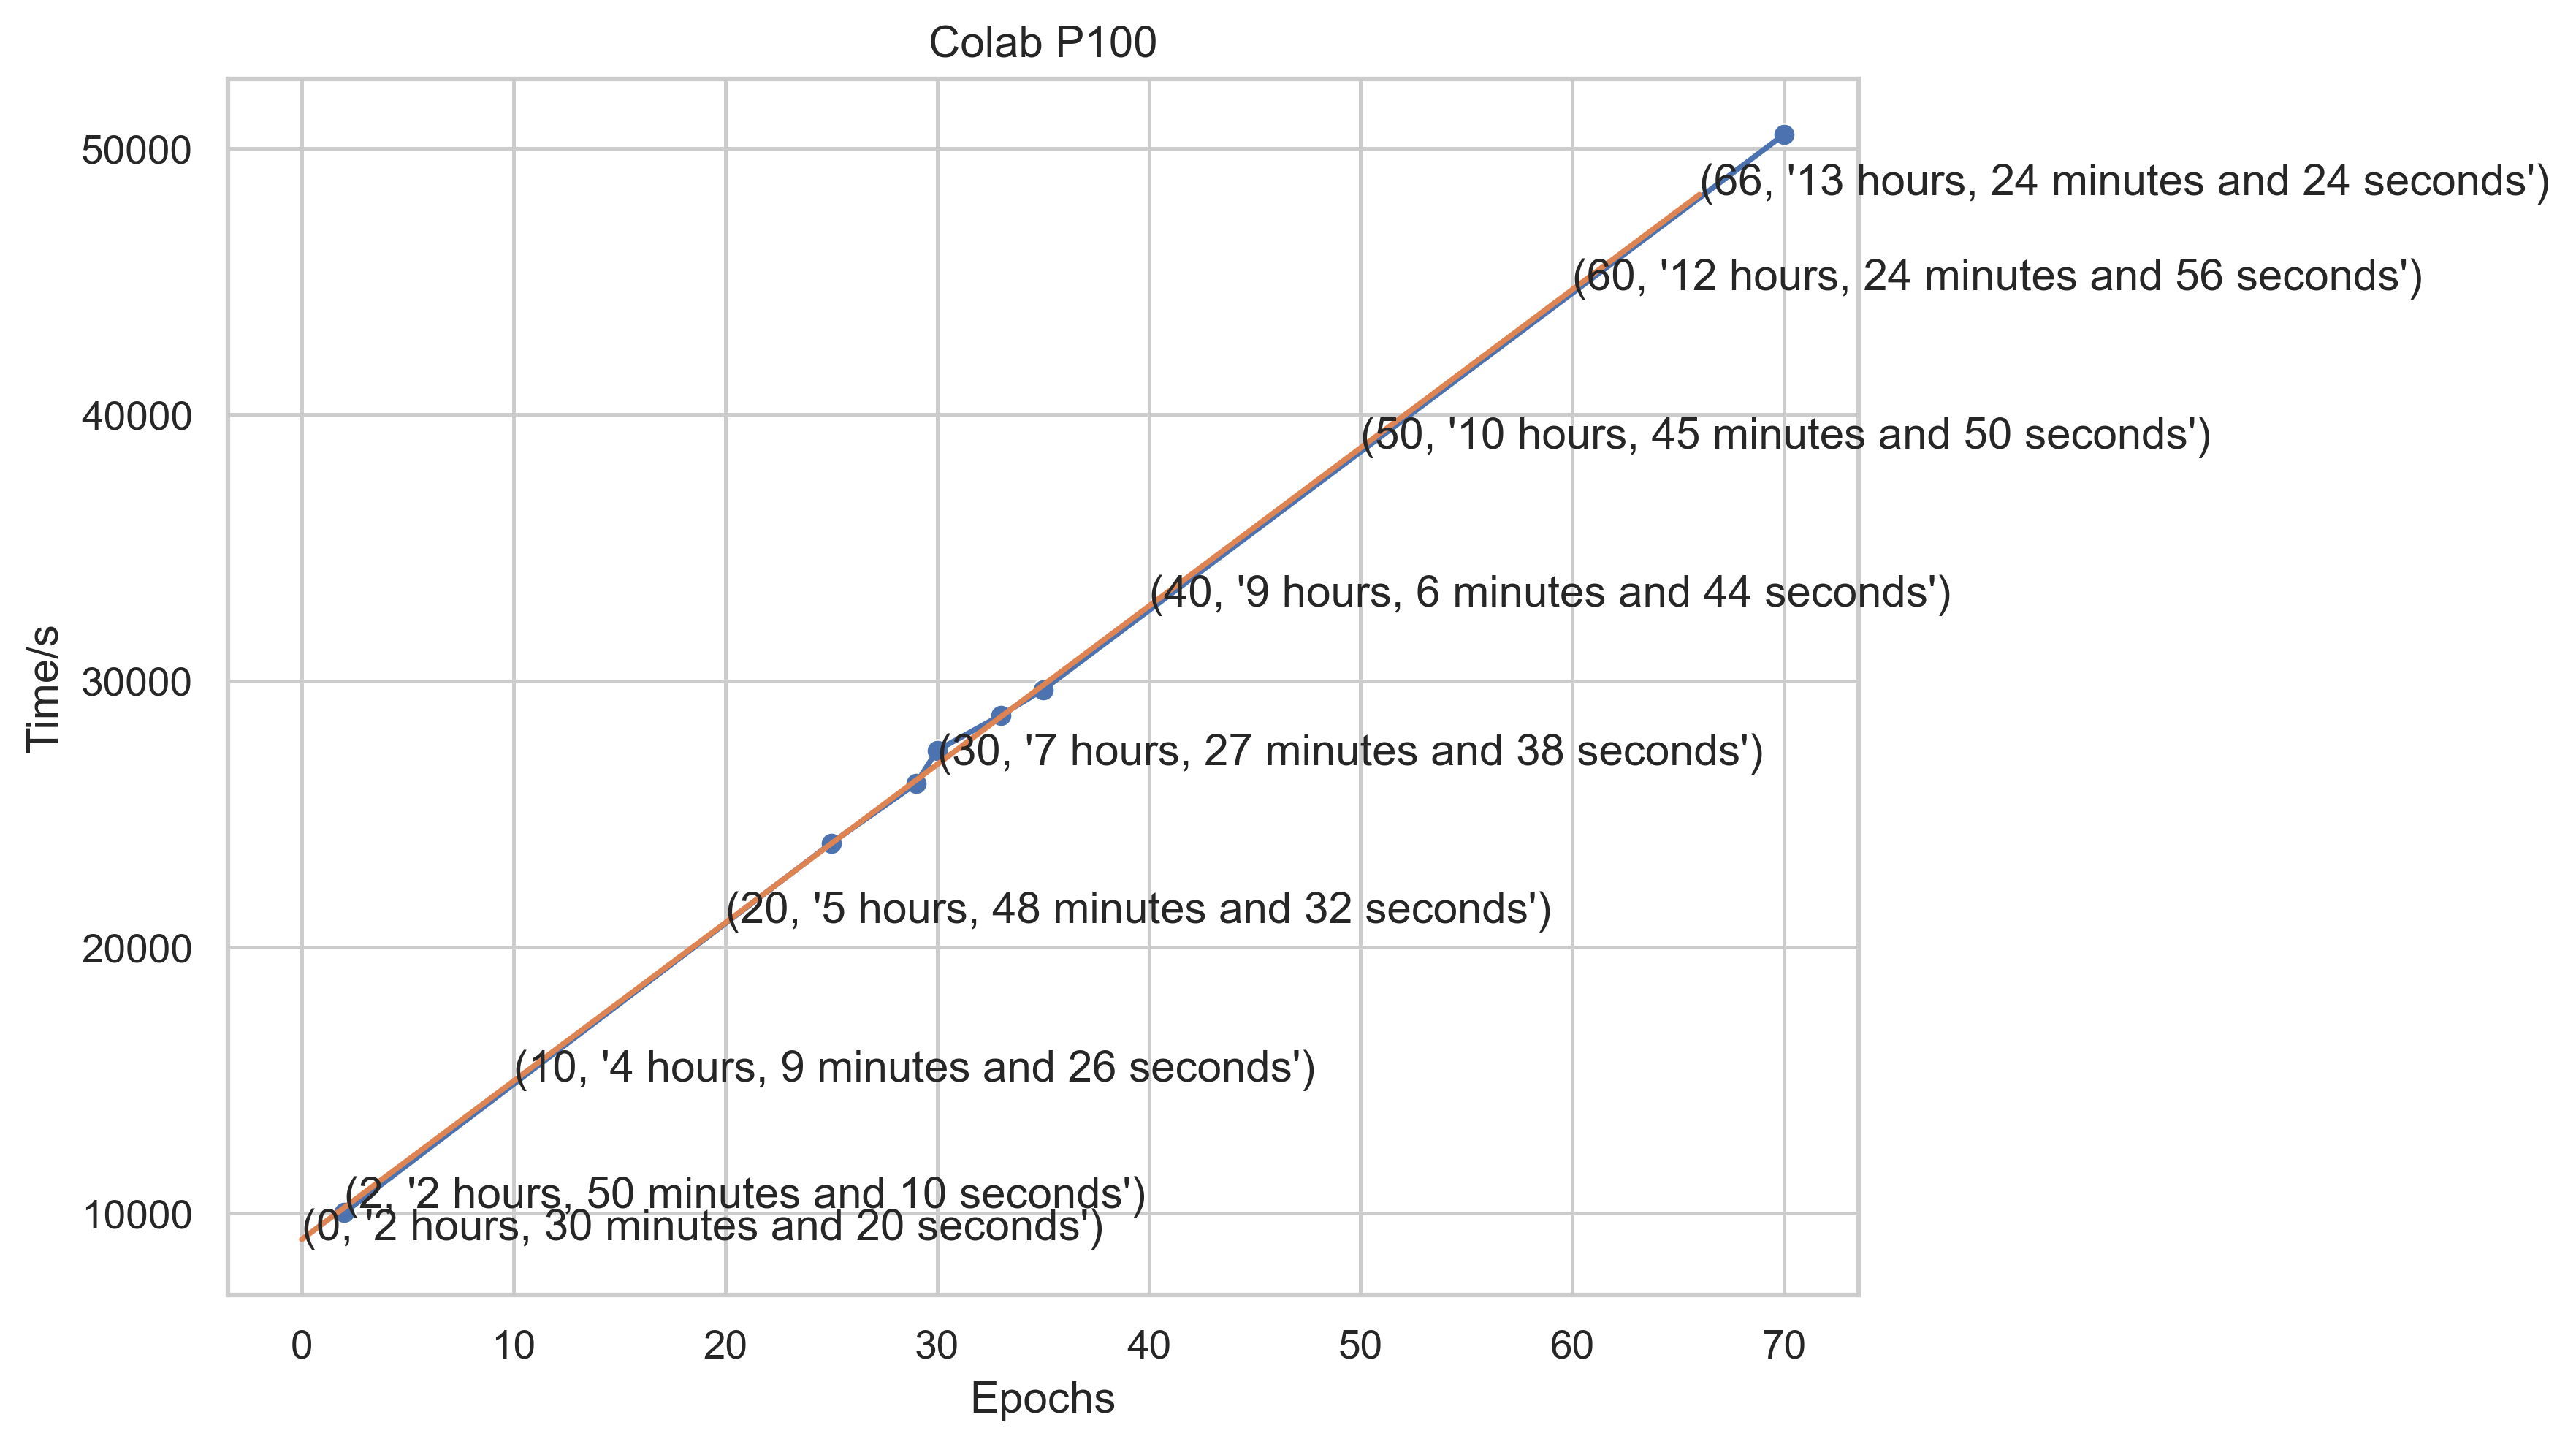

In [32]:
x_pred = [0, 2, 10, 20, 30, 40, 50, 60, 66]
y_pred = predict_time(x, y, x_pred)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=360)
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y)
sns.lineplot(x=x_pred, y=y_pred)
plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Colab P100")
for i in range(len(x_pred)):
    value = humanize.precisedelta(y_pred[i])
    plt.annotate(f"{x_pred[i], value}", (x_pred[i], y_pred[i]))

plt.axvline(33, min(y), max(y))
plot, _ = SAVEFIG(fig, 'Colab_P100', GRAPHICSDIR)
plt.show()

x_p100_colab = x
y_p100_colab = y



In [24]:
x_rtx3090

[2, 10, 20, 30, 34]

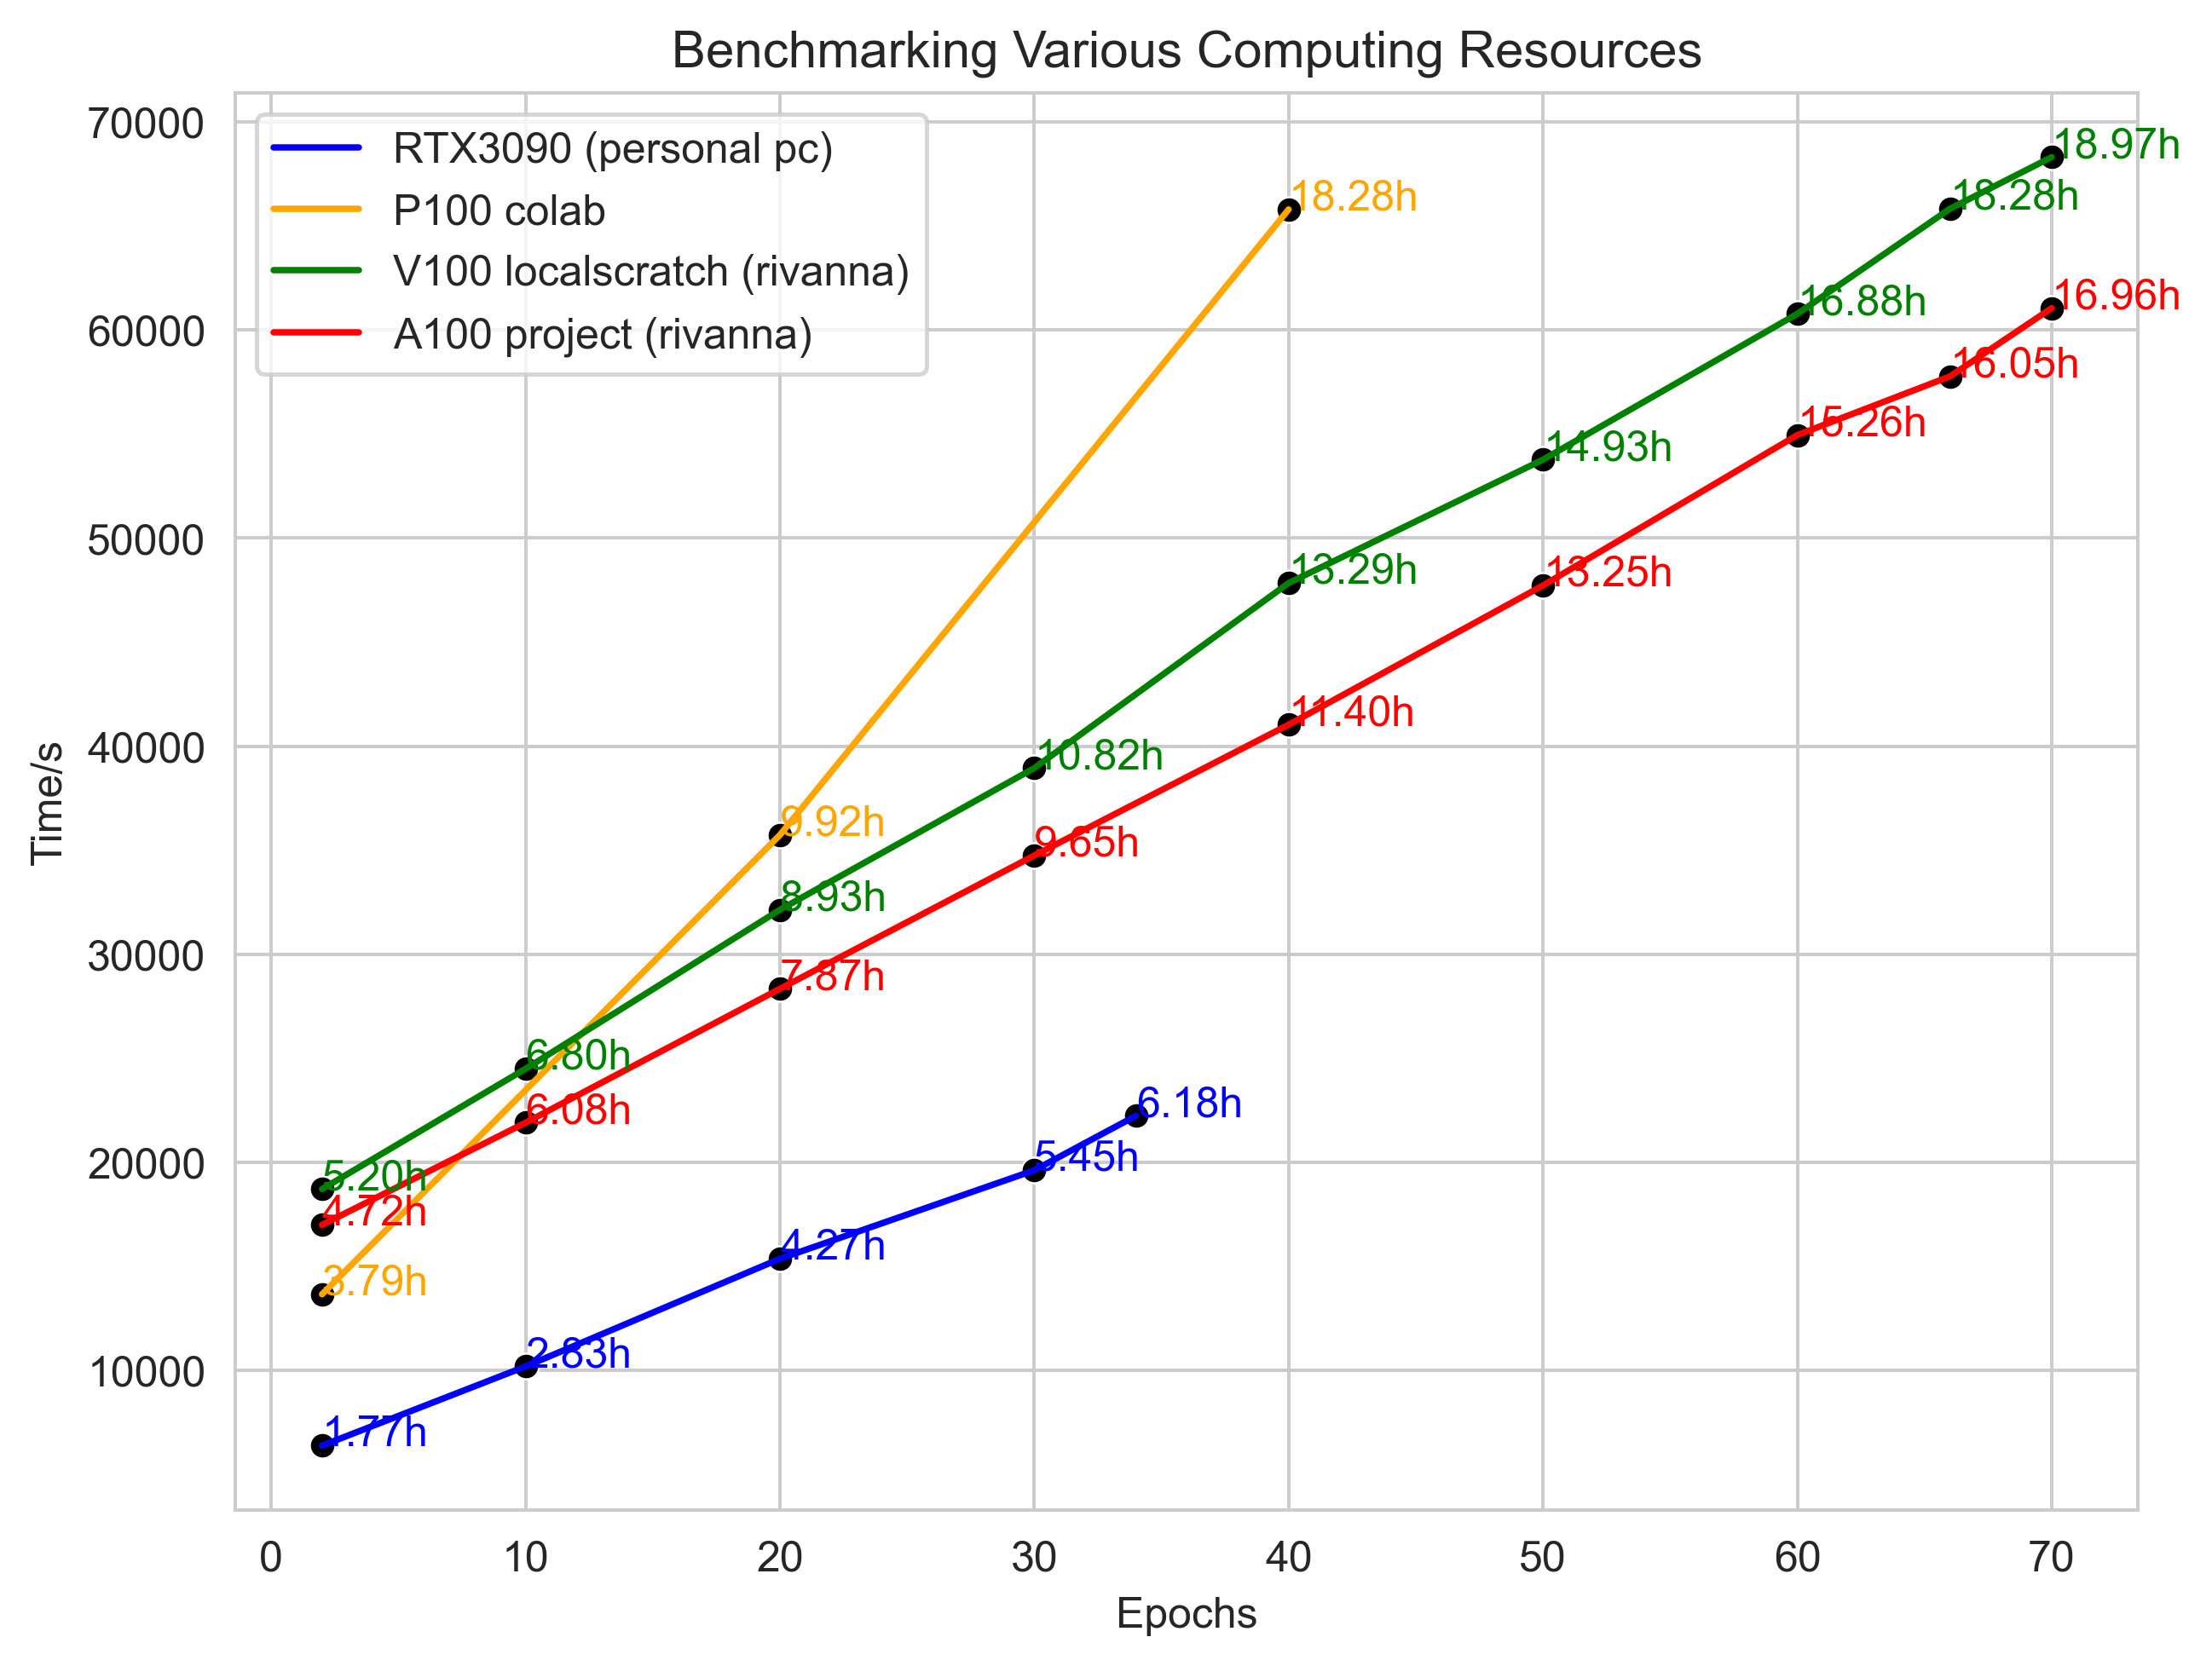

In [25]:
def time_string(content):
    return content.replace(" hours", "h").replace(" minutes", "m").replace(" seconds", "s").replace("days", "d").replace("and", "").replace(",", "")

fig = plt.figure(figsize=(8, 6), dpi=360)

def display_data(x, y, label="RTX3090", color="blue", annotate = True, linestyle=None):
    sns.scatterplot(x=x, y=y, color='black')

    sns.lineplot(x=x, y=y, label=label, color=color, linestyle=linestyle)
    if annotate:
        for i in range(len(x)):
            value = time_string(humanize.precisedelta(y[i],suppress=['minutes','seconds']))
            plt.annotate(f"{value}",(x[i], y[i]), color=color)

x= x_rtx3090
y =y_rtx3090
display_data(x, y, label="RTX3090 (personal pc)", color="blue")

x=x_p100_colab
y=y_p100_colab
display_data(x, y, label="P100 colab", color="orange")

x=x_v100_local
y=y_v100_local
display_data(x, y, label="V100 localscratch (rivanna)", color="green")

x=x_a100_project
y=y_a100_project
display_data(x, y, label="A100 project (rivanna)", color="red")

#x=x_a100_scratch
#y=y_a100_scratch
#display_data(x, y, label="A100 scratch (rivanna)", color="purple", annotate=False)


plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Benchmarking Various Computing Resources")

plot, _ = SAVEFIG(fig, 'Benchmark_comp_resource', GRAPHICSDIR)

#plt.axvline(33, min(y), max(y))
plt.show()


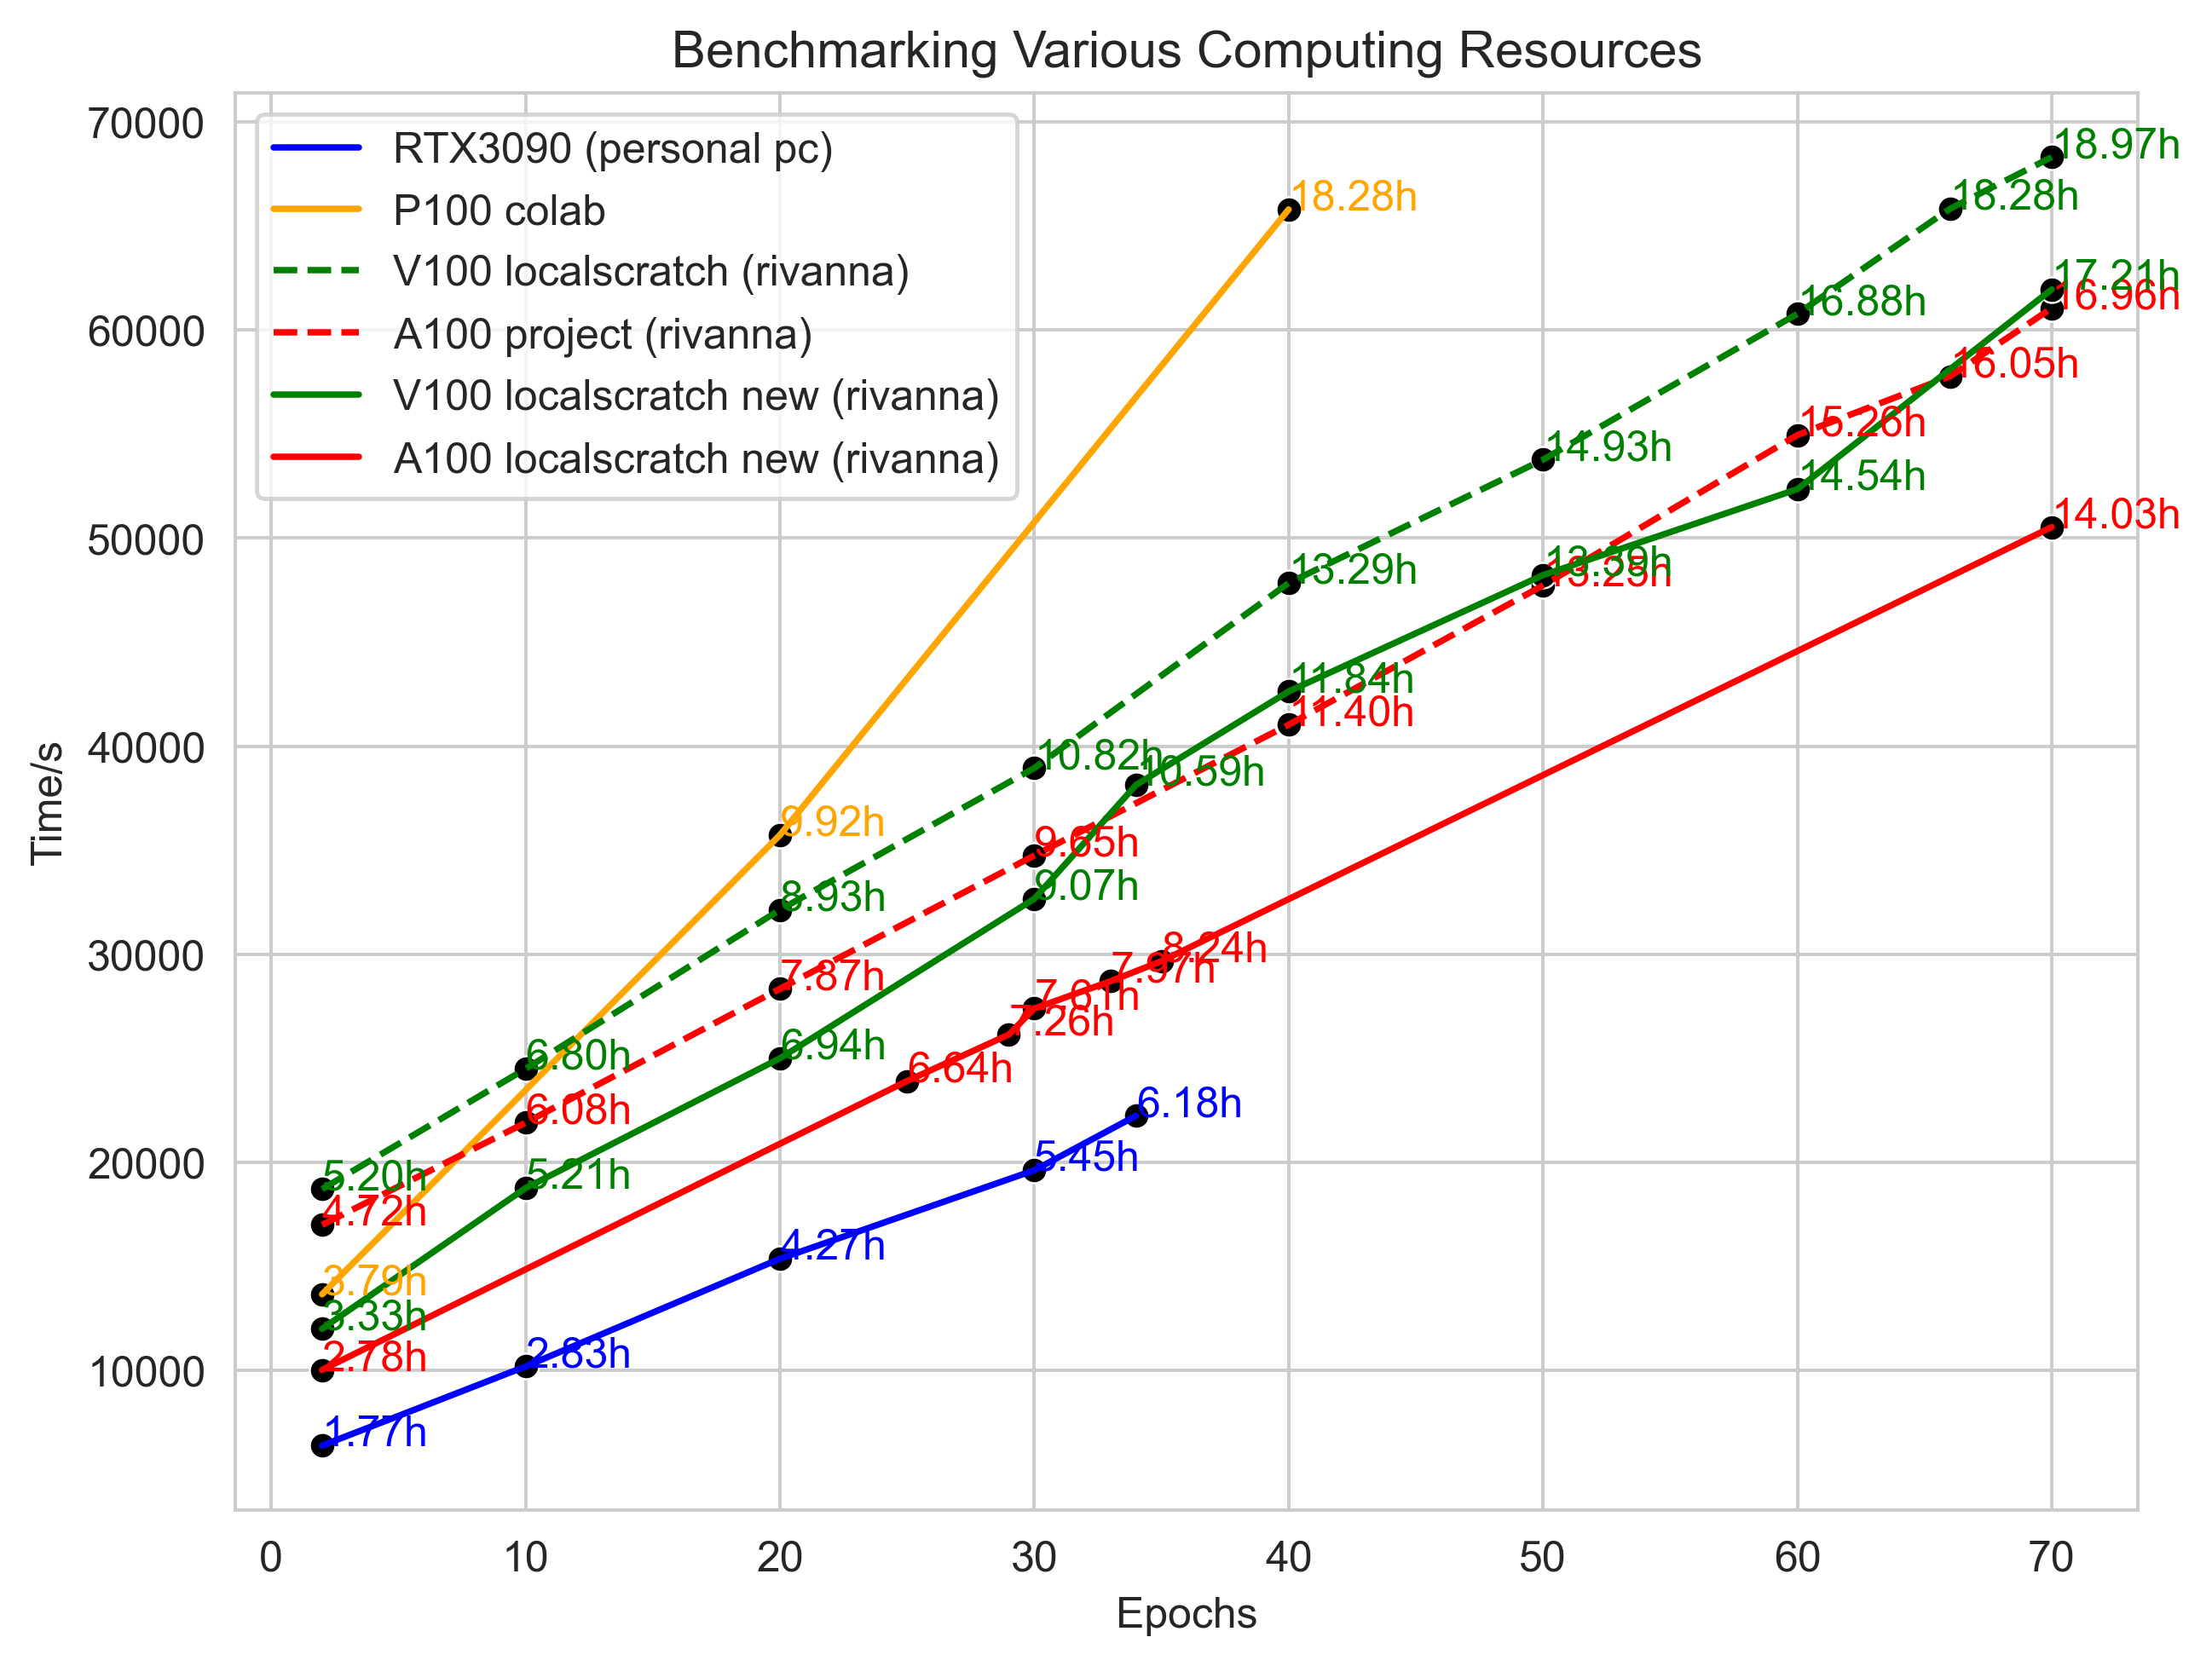

In [26]:

def time_string(content):
    return content.replace(" hours", "h").replace(" minutes", "m").replace(" seconds", "s").replace("days", "d").replace("and", "").replace(",", "")

fig = plt.figure(figsize=(8, 6), dpi=360)

x= x_rtx3090
y =y_rtx3090
display_data(x, y, label="RTX3090 (personal pc)", color="blue")

x=x_p100_colab
y=y_p100_colab
display_data(x, y, label="P100 colab", color="orange")

x=x_v100_local
y=y_v100_local
display_data(x, y, label="V100 localscratch (rivanna)", color="green", linestyle='--')

x=x_a100_project
y=y_a100_project
display_data(x, y, label="A100 project (rivanna)", color="red", linestyle='--')

x = x_v100_localscratch_new = [2, 10, 20, 30, 34, 40, 50, 60, 70]
y = y_v100_localscratch_new = [11994.754, 18756.338, 24994.765, 32658.909, 38131.589, 42625.454, 48215.616, 52346.763, 61947.565]
display_data(x, y, label="V100 localscratch new (rivanna)", color="green")


x = x_a100_localscratch_new = [2, 25, 29, 30, 33, 35, 70]
y = y_a100_localscratch_new = [10020.309, 23904.046, 26133.404, 27386.087, 28700.585, 29663.199, 50525.605]
display_data(x, y, label="A100 localscratch new (rivanna)", color="red")

#x=x_a100_scratch
#y=y_a100_scratch
#display_data(x, y, label="A100 scratch (rivanna)", color="purple", annotate=False)


plt.xlabel("Epochs")
plt.ylabel("Time/s")
plt.title("Benchmarking Various Computing Resources")

plot, _ = SAVEFIG(fig, 'Benchmark_comp_resource_new', GRAPHICSDIR)

#plt.axvline(33, min(y), max(y))
plt.show()


In [27]:
epoch_2
print (epoch_2.keys())
#is already set as index
#epoch_2 = epoch_2.set_index('Timer')
epoch2 = epoch_2.loc[["total", "RunTFTCustomVersion bestfit"]]
epoch2

Index(['K80(r)', 'V100(r)', 'A100(r)', 'RTX3090(G)', 'RTX3080(R)', 'V100(L)'], dtype='object')


,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),V100(L)
Timer,,,,,,
total,28343.3,20295.0,17574.8,6589.41,8348.49,19697.1
RunTFTCustomVersion bestfit,17037.6,14795.1,13022.1,4420.31,4997.13,14303.7


In [28]:
b = df_colab
b.index.name = "Timer"
b = b.loc[["total", "__RunTFTCustomVersion bestfit"]]
b = b.rename(index={'__RunTFTCustomVersion bestfit': 'bestfit'})

b = b.loc[:,"colab_P100_2"]
b

Timer
total      13654.088
bestfit     9126.446
Name: colab_P100_2, dtype: object

In [29]:
c=  epoch_2.loc[["total", "RunTFTCustomVersion bestfit"]]
c = c.rename(index={'RunTFTCustomVersion bestfit': 'bestfit'})
c

,K80(r),V100(r),A100(r),RTX3090(G),RTX3080(R),V100(L)
Timer,,,,,,
total,28343.3,20295.0,17574.8,6589.41,8348.49,19697.1
bestfit,17037.6,14795.1,13022.1,4420.31,4997.13,14303.7


In [30]:
result = pd.concat([c,b], axis=1)
result = result.transpose()
result["timer"] = result.index
result["total"] = result["total"].astype(float)
result["bestfit"] = result["bestfit"].astype(float)
result = result.sort_values(by='total', ascending=False)
result

Timer,total,bestfit,timer
K80(r),28343.300,17037.600,K80(r)
V100(r),20295.000,14795.100,V100(r)
V100(L),19697.100,14303.700,V100(L)
A100(r),17574.800,13022.100,A100(r)
colab_P100_2,13654.088,9126.446,colab_P100_2
RTX3080(R),8348.490,4997.130,RTX3080(R)
RTX3090(G),6589.410,4420.310,RTX3090(G)


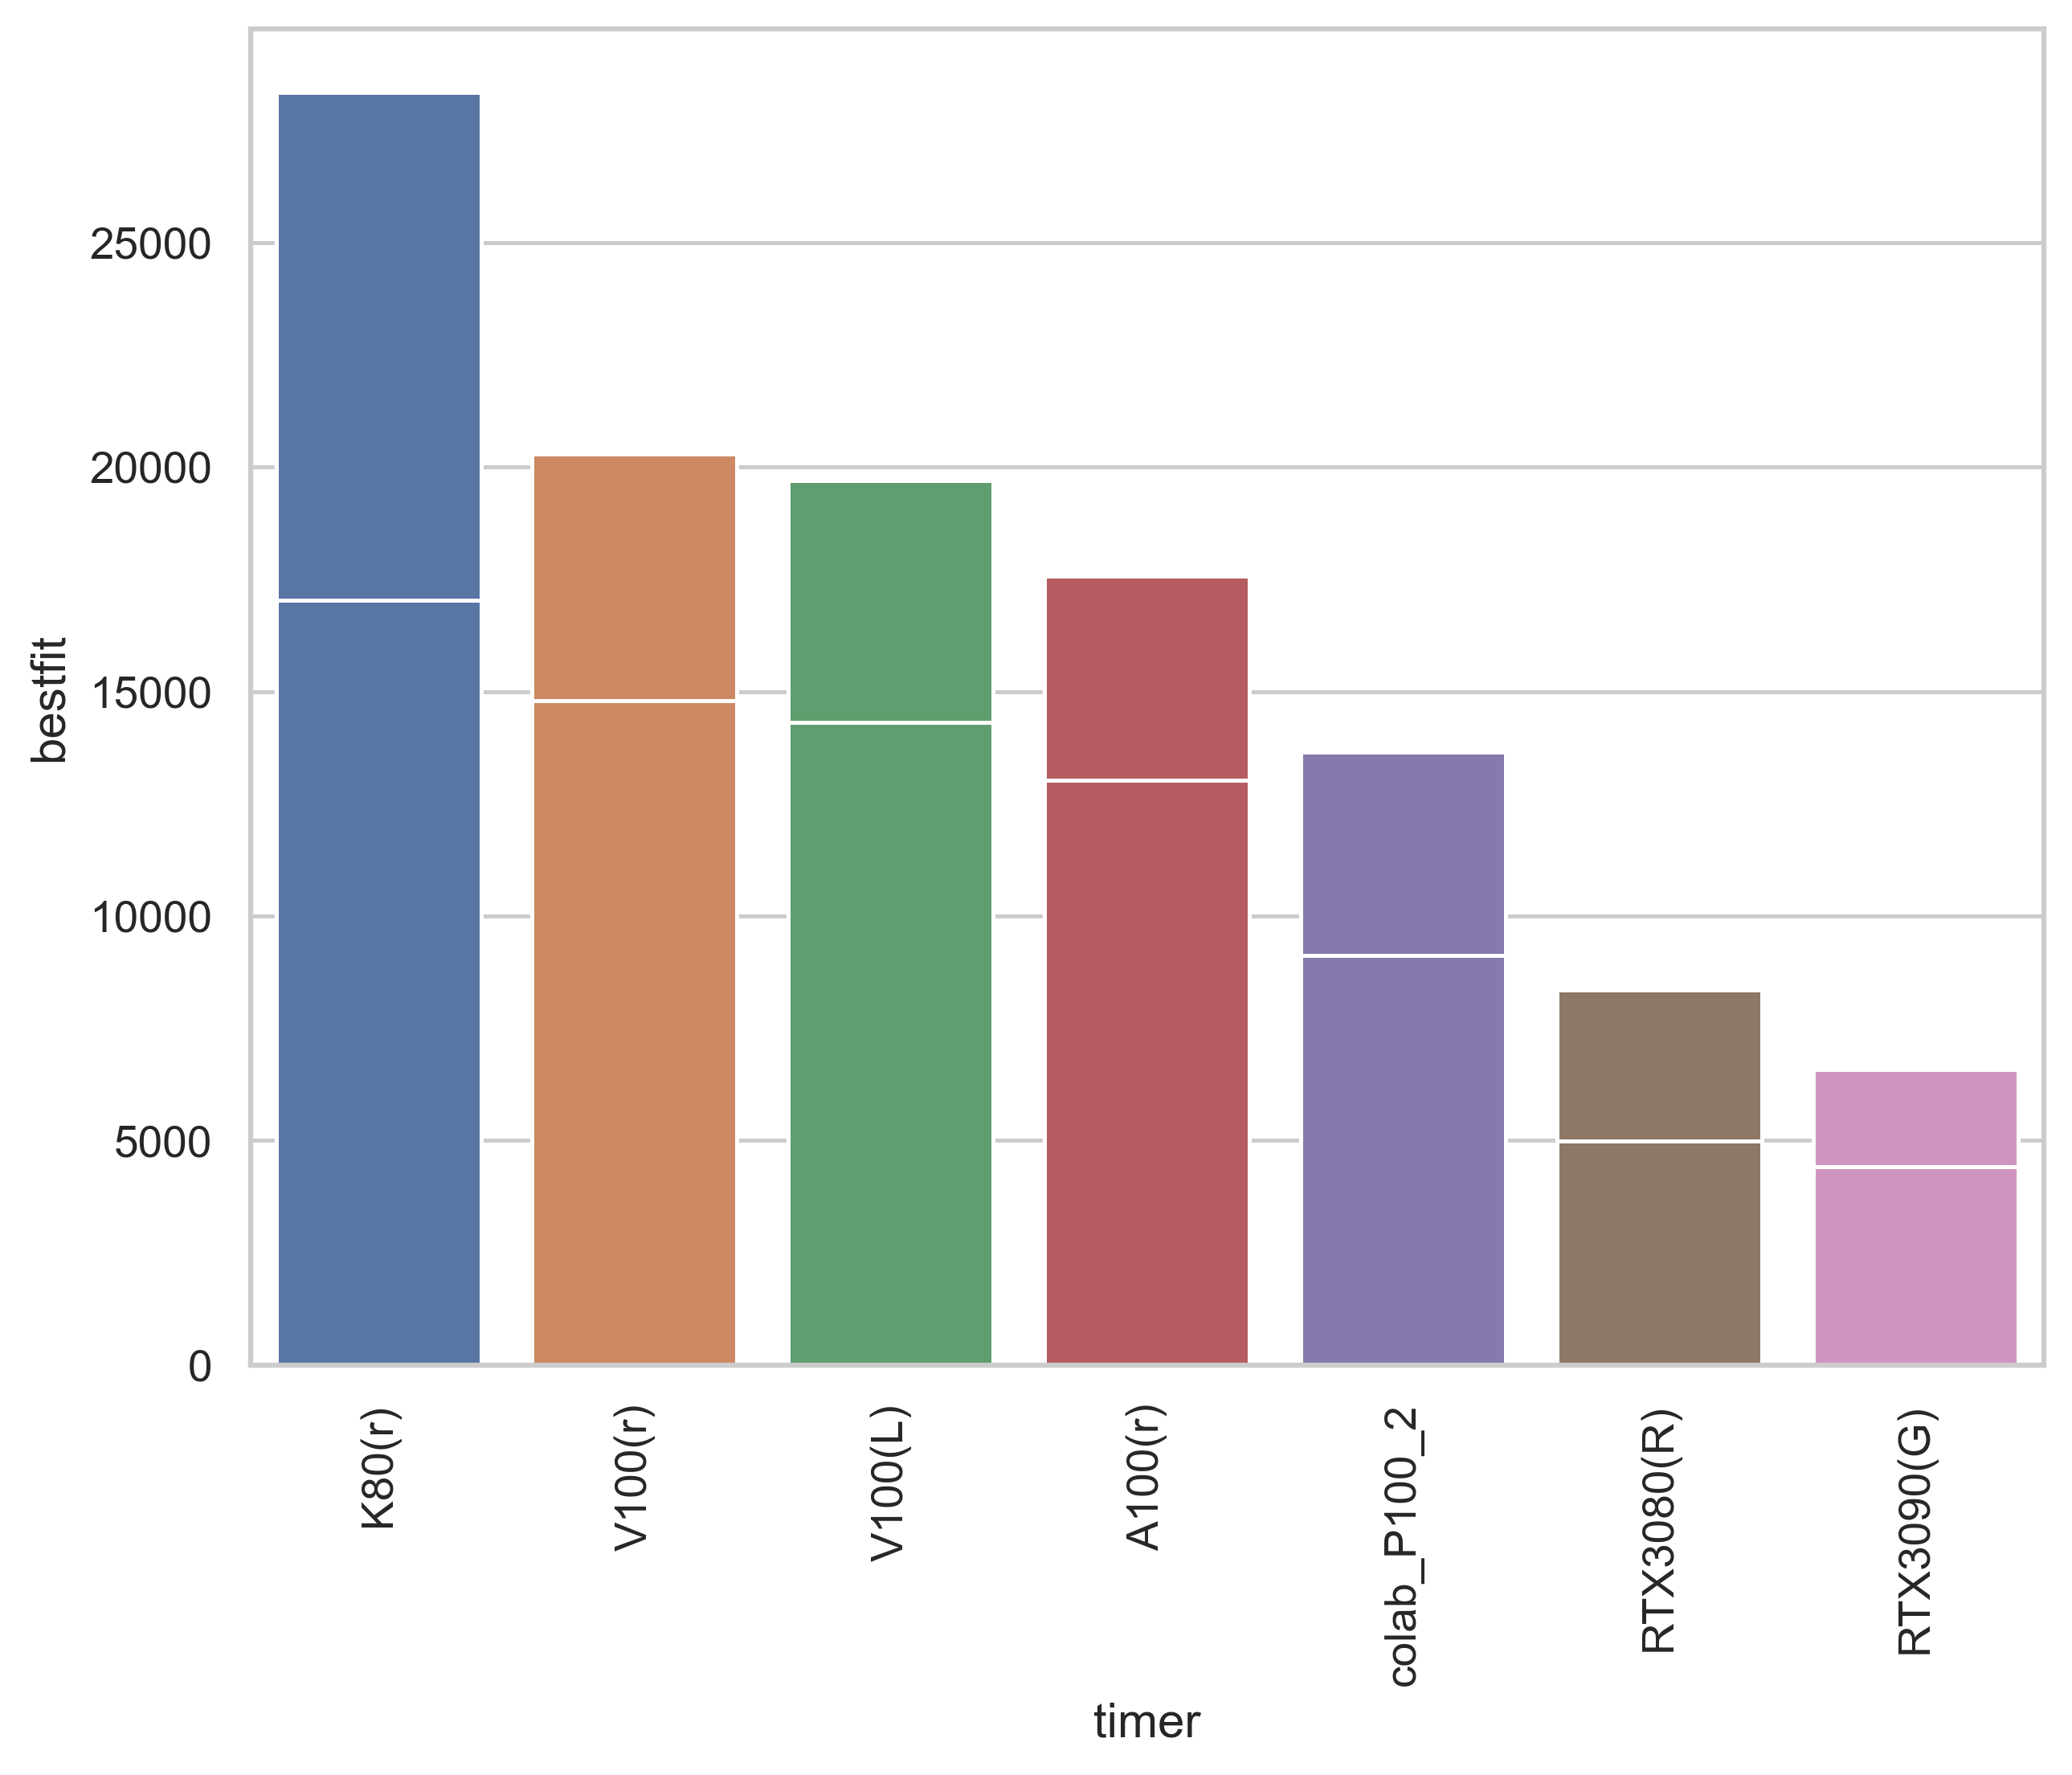

In [31]:
fig = plt.figure(figsize=(8, 6), dpi=360)

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(data=result, x="timer", y="total")
ax = sns.barplot(data=result, x="timer", y="bestfit")
ax.tick_params(axis='x', rotation=90)

plot, _ = SAVEFIG(fig, 'Graphics_Cards_BestFit_bar', GRAPHICSDIR)